# Model Evaluation and Comparison of Forward Particle Filter

Jianning Chen @ Neural Computation Unit

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math as math
import pickle
import os
import seaborn as sns
import scipy.stats as ss
from statistics import variance
from collections import Counter
from statannotations.Annotator import Annotator

In [113]:
result_path = '/Users/chenjianning/Library/CloudStorage/OneDrive-OIST/PhD materials/thesis_study/Particle_filter/result/fitting_result'

In [129]:
Recover = pd.DataFrame()
AlphaVar = []
BetaVar = []
Sim_count = []
RunTime = []
Ntrial = []
sim_length = [f for f in os.listdir(result_path) if not f.startswith('.')]
for s in sim_length:
    path_to_file = result_path + '/' + s
    para_pairs = [f for f in os.listdir(path_to_file) if not f.startswith('.')]
    t = 1
    for i in para_pairs:
        time_pairs = [f for f in os.listdir(path_to_file + '/' + i) if not f.startswith('.')]
        for j in time_pairs:
            AlphaVar.append(float(i.split('_')[0].split('Alpha')[1]))
            BetaVar.append(float(i.split('_')[1].split('beta')[1]))
            Sim_count.append(int(list(j)[0]))
            out_file = [f for f in os.listdir(path_to_file + '/' + i + '/' + j) if '.out' in f]
            f = open(path_to_file + '/' + i + '/' + j + '/' + out_file[0], 'r')
            content = f.read()
            f.close() 
            with open(path_to_file + '/' + i + '/' + j + '/result.pkl', 'rb') as f:
                alldata = pickle.load(f)
            A = pd.read_csv(path_to_file + '/' + i + '/' + j + '/data.csv')
            Pre_result = pd.DataFrame(alldata['parameter']).T
            Pre_result['SSE'] = alldata['SSE'].flatten()
            Pre_result['step'] = pd.Series(alldata['n_step']).tolist()
            Pre_result['MaxLikelihood'] = alldata['MaxLikehood'].flatten()
            Pre_result['Best'] = 0
            Pre_result['alpha1_true'] = float(i.split('_')[0].split('Alpha')[1])
            Pre_result['beta_true'] = float(i.split('_')[1].split('beta')[1])
            Pre_result['fit_time'] = t
            Pre_result['Ntrial'] = int(s.split('_')[1])
            Pre_result.loc[Pre_result['MaxLikelihood'] == Pre_result['MaxLikelihood'].max(), ['Best']] = 1
            Recover = pd.concat([Recover, Pre_result])
            RunTime.append(float(content.split('/')[0])/60)
            Ntrial.append(int(s.split('_')[1]))
            t += 1

In [125]:
Runtime = pd.DataFrame()
Runtime['Time'] = RunTime
Runtime['Ntrial'] = Ntrial
Runtime['AlphaVar'] = AlphaVar
Runtime['BetaVar'] = BetaVar
Runtime['Sim'] = Sim_count

Text(0, 0.5, 'Fitting Duration (min)')

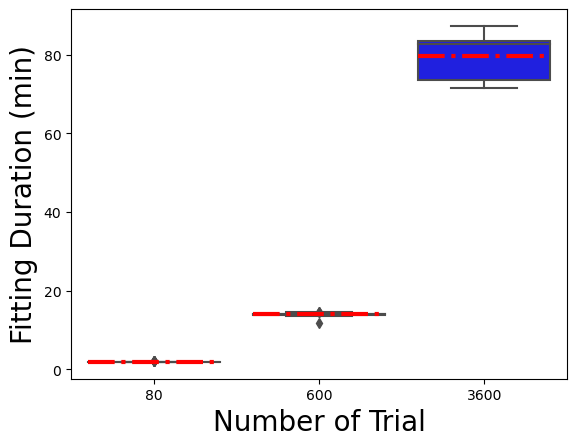

In [127]:
sns.boxplot(x = 'Ntrial', y = 'Time', data = Runtime, color='b')
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'r', 'ls': '-.', 'lw': 3},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x = 'Ntrial', y = 'Time',
            data=Runtime,
            showfliers=False,
            showbox=False,
            showcaps=False)
plt.xlabel('Number of Trial', fontsize = 20)
plt.ylabel('Fitting Duration (min)', fontsize = 20)


In [111]:
print(sns.__version__)

0.12.2


<Axes: xlabel='AlphaVar', ylabel='Time'>

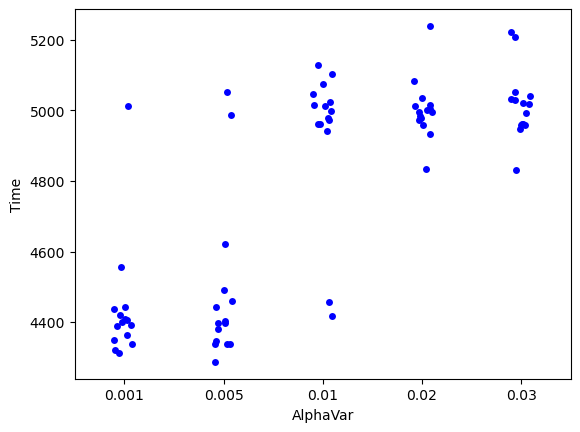

In [82]:
sns.stripplot(x = 'AlphaVar', y = 'Time', data = Runtime.loc[Runtime['Ntrial'] == 3600], jitter = True, color='b')

In [2]:
path_to_file = '/Users/chenjianning/Library/CloudStorage/OneDrive-OIST/PhD materials/thesis_study/Particle_filter/recover'
Recover = pd.DataFrame()

AlphaVar = []
BetaVar = []
Sim_count = []
RunTime = []
all_result = []
t = 1
para_pairs = [f for f in os.listdir(path_to_file) if not f.startswith('.')]
for i in para_pairs:
    time_pairs = [f for f in os.listdir(path_to_file + '/' + i) if not f.startswith('.')]
    for j in time_pairs:
        AlphaVar.append(float(i.split('_')[0].split('Alpha')[1]))
        BetaVar.append(float(i.split('_')[1].split('beta')[1]))
        Sim_count.append(int(list(j)[0]))
        out_file = [f for f in os.listdir(path_to_file + '/' + i + '/' + j) if '.out' in f]
        f = open(path_to_file + '/' + i + '/' + j + '/' + out_file[0], 'r')
        content = f.read()
        f.close() 
        with open(path_to_file + '/' + i + '/' + j + '/result.pkl', 'rb') as f:
            alldata = pickle.load(f)
        A = pd.read_csv(path_to_file + '/' + i + '/' + j + '/data.csv')
        Pre_result = pd.DataFrame(alldata['parameter']).T
        Pre_result['SSE'] = alldata['SSE'].flatten()
        Pre_result['step'] = pd.Series(alldata['n_step']).tolist()
        Pre_result['MaxLikelihood'] = alldata['MaxLikehood'].flatten()
        Pre_result['Best'] = 0
        Pre_result['alpha1_true'] = float(i.split('_')[0].split('Alpha')[1])
        Pre_result['beta_true'] = float(i.split('_')[1].split('beta')[1])
        Pre_result['fit_time'] = t
        Pre_result.loc[Pre_result['MaxLikelihood'] == Pre_result['MaxLikelihood'].max(), ['Best']] = 1
        Recover = pd.concat([Recover, Pre_result])
        RunTime.append(float(content.split('/')[0]))
        t += 1

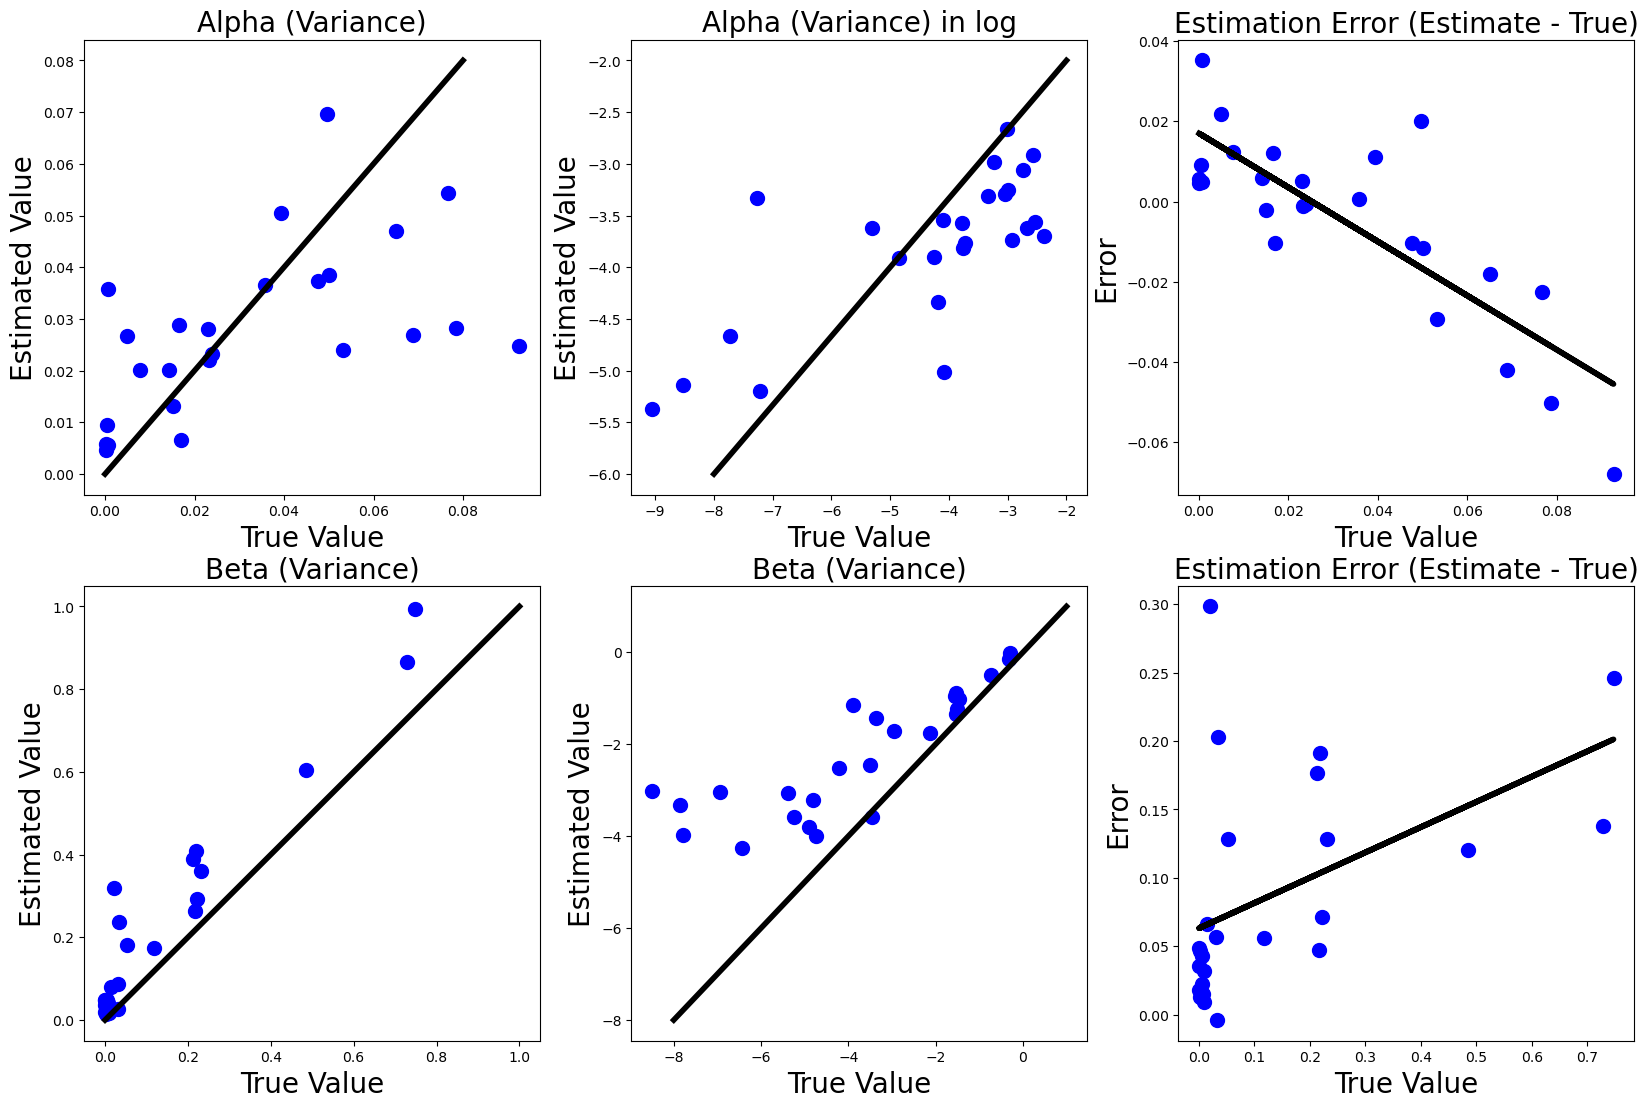

In [111]:
fig = plt.figure(figsize = (20,13))
ax1 = fig.add_subplot(231)
ax1.scatter(np.array(alpha_true_dis).reshape(25,3).mean(1), np.array(alpha_est_dis).reshape(25,3).mean(1), s = 100, c = 'b')
ax1.plot([0,0.08], [0,0.08], linewidth = 4, c = 'k')
ax1.set_xlabel('True Value', fontsize = 20)
ax1.set_ylabel('Estimated Value', fontsize = 20)
ax1.set_title('Alpha (Variance)', fontsize = 20)

ax2 = fig.add_subplot(232)
ax2.scatter(np.log(np.array(alpha_true_dis).reshape(25,3).mean(1)), np.log(np.array(alpha_est_dis).reshape(25,3).mean(1)), s = 100, c = 'b')
ax2.plot([-8,-2], [-6,-2], linewidth = 4, c = 'k')
ax2.set_xlabel('True Value', fontsize = 20)
ax2.set_ylabel('Estimated Value', fontsize = 20)
ax2.set_title('Alpha (Variance) in log', fontsize = 20)

ax3 = fig.add_subplot(233)
ax3.scatter(np.array(alpha_true_dis).reshape(25,3).mean(1), (np.array(alpha_est_dis).reshape(25,3).mean(1) - np.array(alpha_true_dis).reshape(25,3).mean(1)), s = 100, c = 'b')
ax3.set_ylabel('Error', fontsize = 20)
ax3.set_title('Estimation Error (Estimate - True)', fontsize = 20)
ax3.plot(np.array(alpha_true_dis).reshape(25,3).mean(1), np.poly1d(np.polyfit(np.array(alpha_true_dis).reshape(25,3).mean(1), (np.array(alpha_est_dis).reshape(25,3).mean(1) - np.array(alpha_true_dis).reshape(25,3).mean(1)), 1))(np.array(alpha_true_dis).reshape(25,3).mean(1)), linewidth = 4, c = 'k')
ax3.set_xlabel('True Value', fontsize = 20)

ax4 = fig.add_subplot(234)
ax4.scatter(np.array(beta_true_dis).reshape(25,3).mean(1), np.array(beta_est_dis).reshape(25,3).mean(1), s = 100, c = 'b')
ax4.plot([0,1], [0,1], linewidth = 4, c = 'k')
ax4.set_xlabel('True Value', fontsize = 20)
ax4.set_ylabel('Estimated Value', fontsize = 20)
ax4.set_title('Beta (Variance)', fontsize = 20)

ax5 = fig.add_subplot(235)
ax5.scatter(np.log(np.array(beta_true_dis).reshape(25,3).mean(1)), np.log(np.array(beta_est_dis).reshape(25,3).mean(1)), s = 100, c = 'b')
ax5.plot([-8,1], [-8,1], linewidth = 4, c = 'k')
ax5.set_xlabel('True Value', fontsize = 20)
ax5.set_ylabel('Estimated Value', fontsize = 20)
ax5.set_title('Beta (Variance)', fontsize = 20)

ax6 = fig.add_subplot(236)
ax6.scatter(np.array(beta_true_dis).reshape(25,3).mean(1), (np.array(beta_est_dis).reshape(25,3).mean(1) - np.array(beta_true_dis).reshape(25,3).mean(1)), s = 100, c = 'b')
ax6.set_xlabel('True Value', fontsize = 20)
ax6.set_ylabel('Error', fontsize = 20)
ax6.set_title('Estimation Error (Estimate - True)', fontsize = 20)
ax6.set_xlabel('True Value', fontsize = 20)
ax6.plot(np.array(beta_true_dis).reshape(25,3).mean(1), np.poly1d(np.polyfit(np.array(beta_true_dis).reshape(25,3).mean(1), (np.array(beta_est_dis).reshape(25,3).mean(1) - np.array(beta_true_dis).reshape(25,3).mean(1)), 1))(np.array(beta_true_dis).reshape(25,3).mean(1)), linewidth = 4, c = 'k')

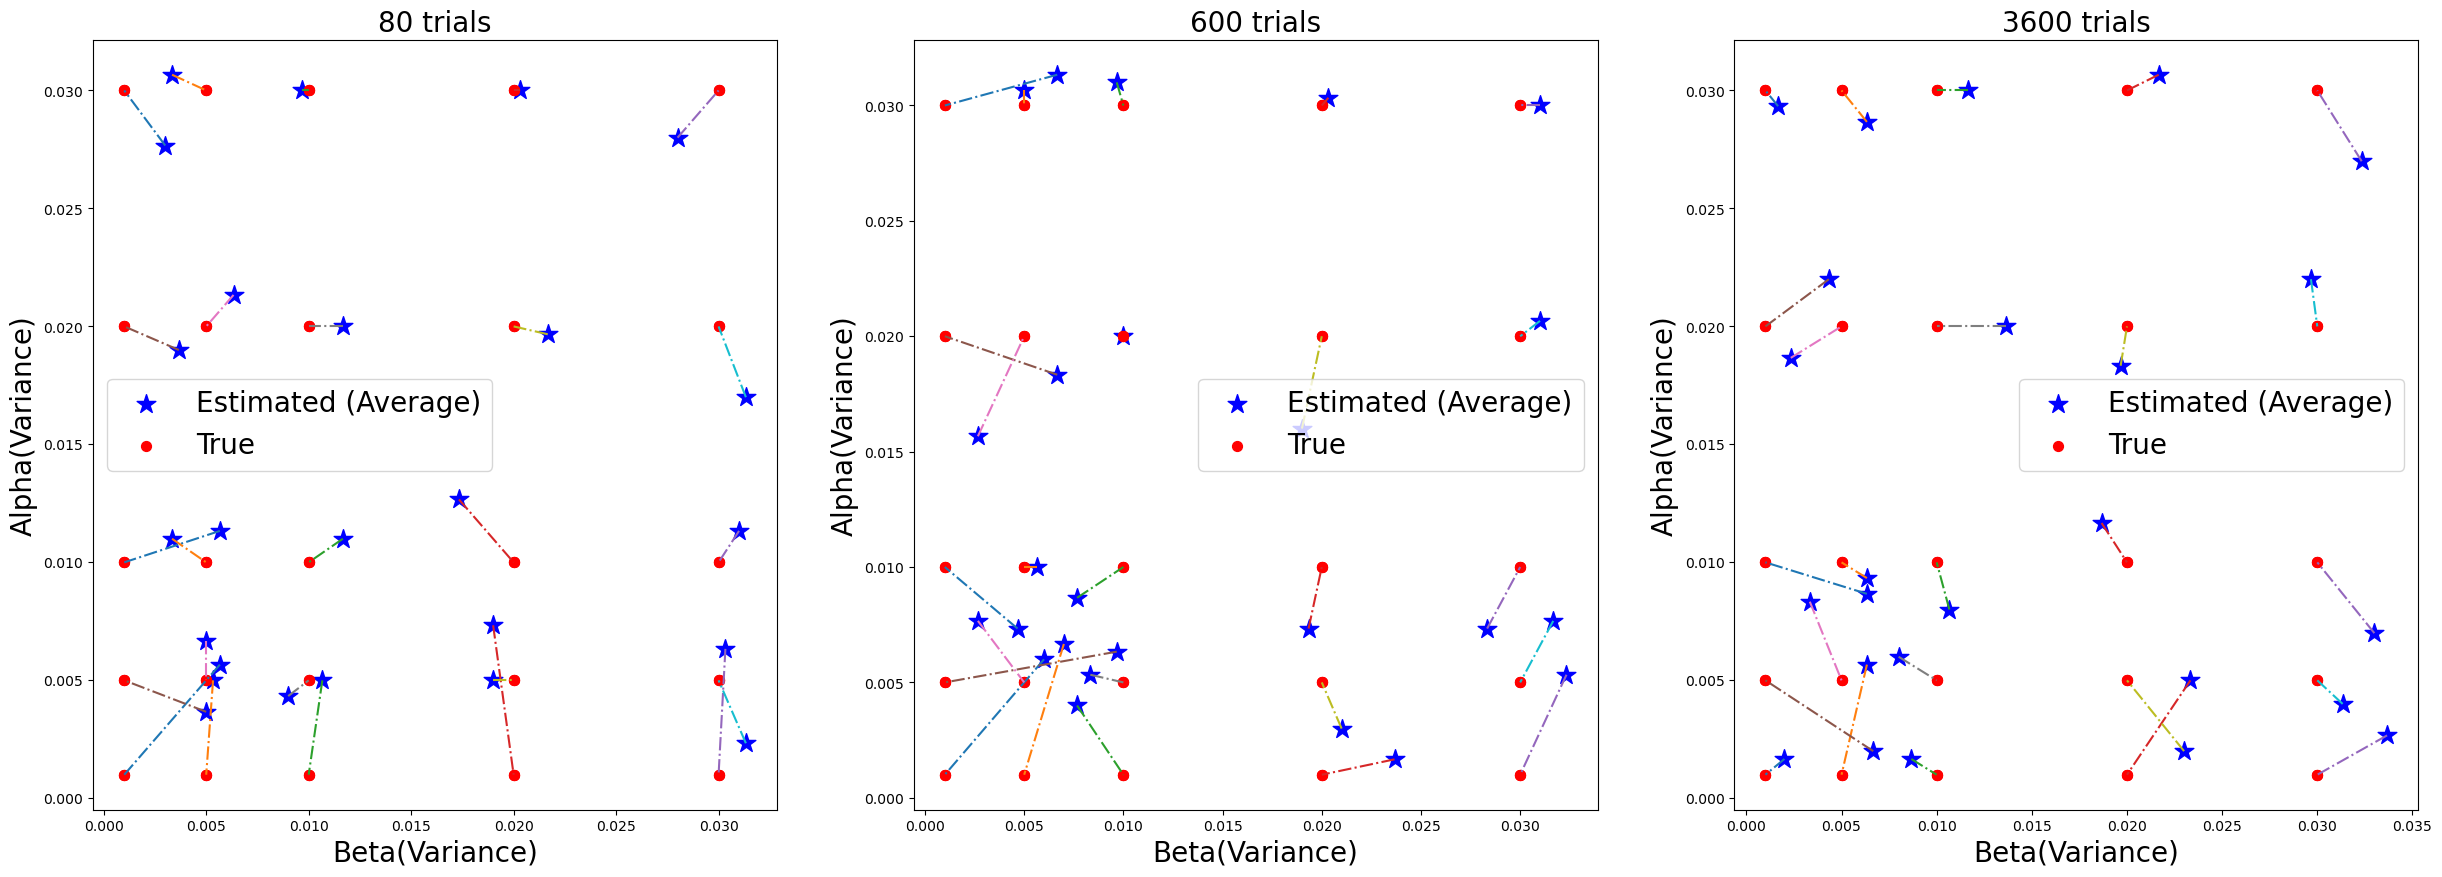

In [142]:
fig = plt.figure(figsize = (30,10))

for z, s in enumerate([80, 600, 3600]):
    ax = fig.add_subplot(1,3,z+1)
    for i in [0.001,0.005, 0.01, 0.02, 0.03]:
        for j in [0.001, 0.005, 0.01, 0.02, 0.03]:
            thistime = Recover.loc[(Recover['Best'] == 1) & (Recover['beta_true'] == i)& (Recover['alpha1_true'] == j)& (Recover['Ntrial'] == s)]
            ax.scatter(thistime['alpha1'].mean(), thistime['beta'].mean(), s = 200, c = 'b', marker = '*', label = 'Estimated')
            ax.scatter(thistime['alpha1_true'], thistime['beta_true'], s = 50, c = 'r', marker = 'o', label = 'True')
            ax.plot([thistime['alpha1'].mean(), thistime['alpha1_true'].mean()], [thistime['beta'].mean(), thistime['beta_true'].mean()], linestyle = '-.')
    ax.set_xlabel('Beta(Variance)', fontsize = 20)
    ax.set_ylabel('Alpha(Variance)', fontsize = 20)
    ax.set_title(str(s) + ' trials', fontsize = 20)
    ax.legend(['Estimated (Average)', 'True'], fontsize = 20)

In [ ]:
path_to_file = '/Users/chenjianning/Library/CloudStorage/OneDrive-OIST/PhD materials/thesis_study/Particle_filter/recover'
Recover = pd.DataFrame()

AlphaVar = []
BetaVar = []
Sim_count = []
RunTime = []
all_result = []
t = 1
para_pairs = [f for f in os.listdir(path_to_file) if not f.startswith('.')]
for i in para_pairs:
    time_pairs = [f for f in os.listdir(path_to_file + '/' + i) if not f.startswith('.')]
    for j in time_pairs:
        AlphaVar.append(float(i.split('_')[0].split('Alpha')[1]))
        BetaVar.append(float(i.split('_')[1].split('beta')[1]))
        Sim_count.append(int(list(j)[0]))
        out_file = [f for f in os.listdir(path_to_file + '/' + i + '/' + j) if '.out' in f]
        f = open(path_to_file + '/' + i + '/' + j + '/' + out_file[0], 'r')
        content = f.read()
        f.close() 
        with open(path_to_file + '/' + i + '/' + j + '/result.pkl', 'rb') as f:
            alldata = pickle.load(f)
        A = pd.read_csv(path_to_file + '/' + i + '/' + j + '/data.csv')
        Pre_result = pd.DataFrame(alldata['parameter']).T
        Pre_result['SSE'] = alldata['SSE'].flatten()
        Pre_result['step'] = pd.Series(alldata['n_step']).tolist()
        Pre_result['MaxLikelihood'] = alldata['MaxLikehood'].flatten()
        Pre_result['Best'] = 0
        Pre_result['alpha1_true'] = float(i.split('_')[0].split('Alpha')[1])
        Pre_result['beta_true'] = float(i.split('_')[1].split('beta')[1])
        Pre_result['fit_time'] = t
        Pre_result.loc[Pre_result['MaxLikelihood'] == Pre_result['MaxLikelihood'].max(), ['Best']] = 1
        Recover = pd.concat([Recover, Pre_result])
        RunTime.append(float(content.split('/')[0]))
        t += 1

Text(0, 0.5, 'True Alpha (Variance)')

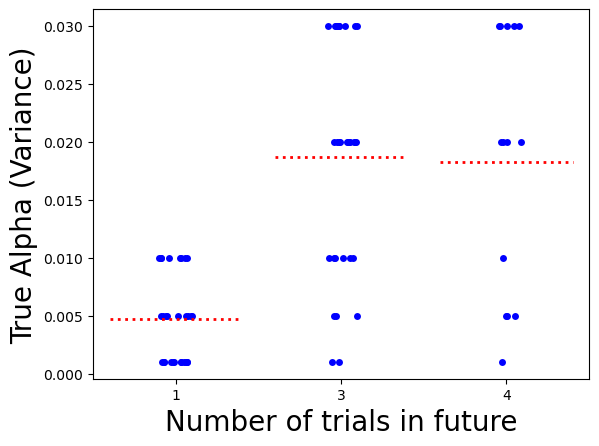

In [14]:
sns.stripplot(x = 'step', y = 'alpha1_true', data = Recover.loc[Recover['Best'] == 1], jitter= True, color = 'b')
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'r', 'ls': ':', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x = 'step', y = 'alpha1_true',
            data=Recover.loc[Recover['Best'] == 1],
            showfliers=False,
            showbox=False,
            showcaps=False)
plt.xlabel('Number of trials in future', fontsize = 20)
plt.ylabel('True Alpha (Variance)', fontsize = 20)

In [16]:
path_to_file = '/Users/chenjianning/Library/CloudStorage/OneDrive-OIST/PhD materials/thesis_study/Particle_filter/recover'
Recover = pd.DataFrame()

AlphaVar = []
BetaVar = []
Sim_count = []
RunTime = []
all_result = []
t = 1
para_pairs = [f for f in os.listdir(path_to_file) if not f.startswith('.')]
for i in para_pairs:
    time_pairs = [f for f in os.listdir(path_to_file + '/' + i) if not f.startswith('.')]
    for j in time_pairs:
        AlphaVar.append(float(i.split('_')[0].split('Alpha')[1]))
        BetaVar.append(float(i.split('_')[1].split('beta')[1]))
        Sim_count.append(int(list(j)[0]))
        out_file = [f for f in os.listdir(path_to_file + '/' + i + '/' + j) if '.out' in f]
        f = open(path_to_file + '/' + i + '/' + j + '/' + out_file[0], 'r')
        content = f.read()
        f.close() 
        with open(path_to_file + '/' + i + '/' + j + '/result.pkl', 'rb') as f:
            alldata = pickle.load(f)
        A = pd.read_csv(path_to_file + '/' + i + '/' + j + '/data.csv')
        Pre_result = pd.DataFrame(alldata['parameter']).T
        Pre_result['SSE'] = alldata['SSE'].flatten()
        Pre_result['step'] = pd.Series(alldata['n_step']).tolist()
        Pre_result['MaxLikelihood'] = alldata['MaxLikehood'].flatten()
        Pre_result['Best'] = 0
        Pre_result['alpha1_true'] = float(i.split('_')[0].split('Alpha')[1])
        Pre_result['beta_true'] = float(i.split('_')[1].split('beta')[1])
        Pre_result['fit_time'] = t
        Pre_result.loc[Pre_result['MaxLikelihood'] == Pre_result['MaxLikelihood'].max(), ['Best']] = 1
        Recover = pd.concat([Recover, Pre_result])
        RunTime.append(float(content.split('/')[0]))
        t += 1

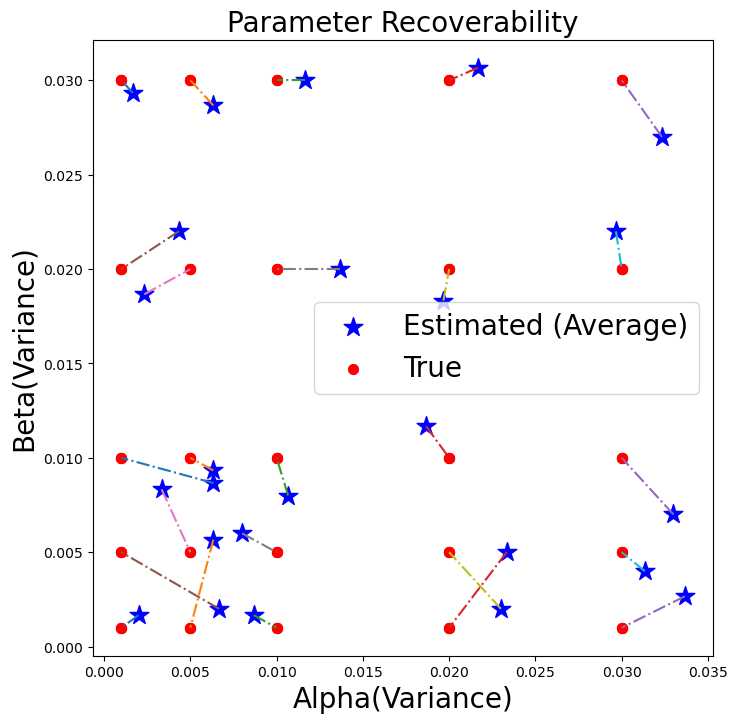

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
for i in [0.001,0.005, 0.01, 0.02, 0.03]:
    for j in [0.001, 0.005, 0.01, 0.02, 0.03]:
        thistime = Recover.loc[(Recover['Best'] == 1) & (Recover['beta_true'] == i)& (Recover['alpha1_true'] == j)]
        ax.scatter(thistime['alpha1'].mean(), thistime['beta'].mean(), s = 200, c = 'b', marker = '*', label = 'Estimated')
        ax.scatter(thistime['alpha1_true'], thistime['beta_true'], s = 50, c = 'r', marker = 'o', label = 'True')
        ax.plot([thistime['alpha1'].mean(), thistime['alpha1_true'].mean()], [thistime['beta'].mean(), thistime['beta_true'].mean()], linestyle = '-.')
ax.set_xlabel('Alpha(Variance)', fontsize = 20)
ax.set_ylabel('Beta(Variance)', fontsize = 20)
ax.set_title('Parameter Recoverability', fontsize = 20)
ax.legend(['Estimated (Average)', 'True'], fontsize = 20)

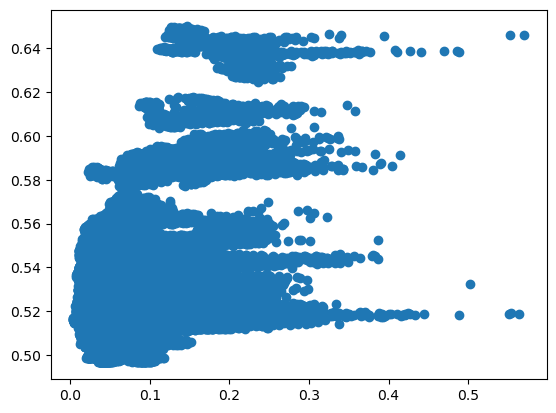

In [186]:
plt.scatter(Recover['SSE'], Recover['MaxLikelihood'])

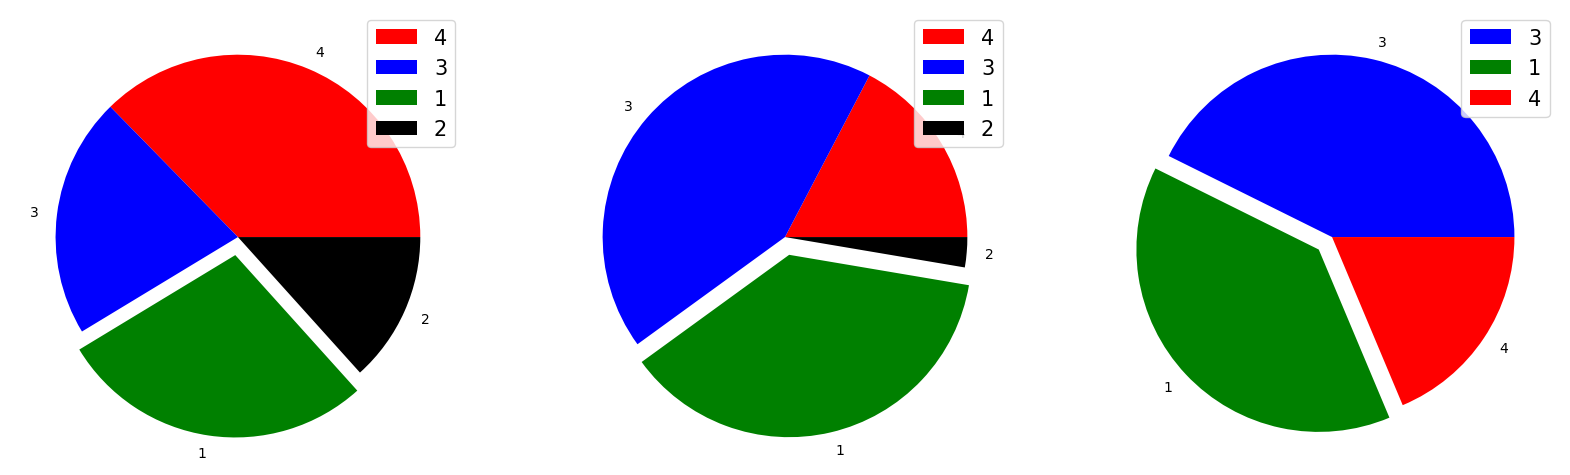

In [200]:
fig = plt.figure(figsize = (20,15))
ax1 = fig.add_subplot(1,3, 1)
ax1.pie(Counter(Recover.loc[(Recover['Best'] == 1) & (Recover['Ntrial'] == 80), 'step']).values(), labels = Counter(Recover.loc[(Recover['Best'] == 1) & (Recover['Ntrial'] == 80), 'step']).keys(), explode=[0,0,0.1,0], colors = ['r', 'b', 'g', 'k'])
ax1.legend(fontsize = 15, loc = 'upper right')
ax2 = fig.add_subplot(1,3,2)
ax2.pie(Counter(Recover.loc[(Recover['Best'] == 1) & (Recover['Ntrial'] == 600), 'step']).values(), labels = Counter(Recover.loc[(Recover['Best'] == 1) & (Recover['Ntrial'] == 600), 'step']).keys(), explode=[0,0,0.1,0], colors = ['r', 'b', 'g', 'k'])
ax2.legend(fontsize = 15, loc = 'upper right')
ax3 = fig.add_subplot(1,3,3)
ax3.pie(Counter(Recover.loc[(Recover['Best'] == 1) & (Recover['Ntrial'] == 3600), 'step']).values(), labels = Counter(Recover.loc[(Recover['Best'] == 1) & (Recover['Ntrial'] == 3600), 'step']).keys(), explode=[0,0.1,0], colors = ['b', 'g', 'r'])
ax3.legend(fontsize = 15, loc = 'upper right')

ValueError: 'explode' must be of length 'x'

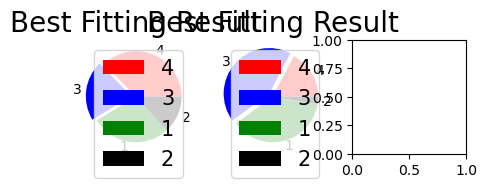

In [190]:
fig = plt.figure(figsize = (5,15))
for z, s in enumerate([80, 600, 3600]):
    ax = fig.add_subplot(1,3, z+1)
    ax.pie(Counter(Recover.loc[(Recover['Best'] == 1) & (Recover['Ntrial'] == s), 'step']).values(), labels = Counter(Recover.loc[(Recover['Best'] == 1) & (Recover['Ntrial'] == s), 'step']).keys(), explode=[0,0.1,0, 0], colors = ['r', 'b', 'g', 'k'])
    ax.legend(fontsize = 15, loc = 'upper right')
    ax.set_title('Best Fitting Result', fontsize = 20)

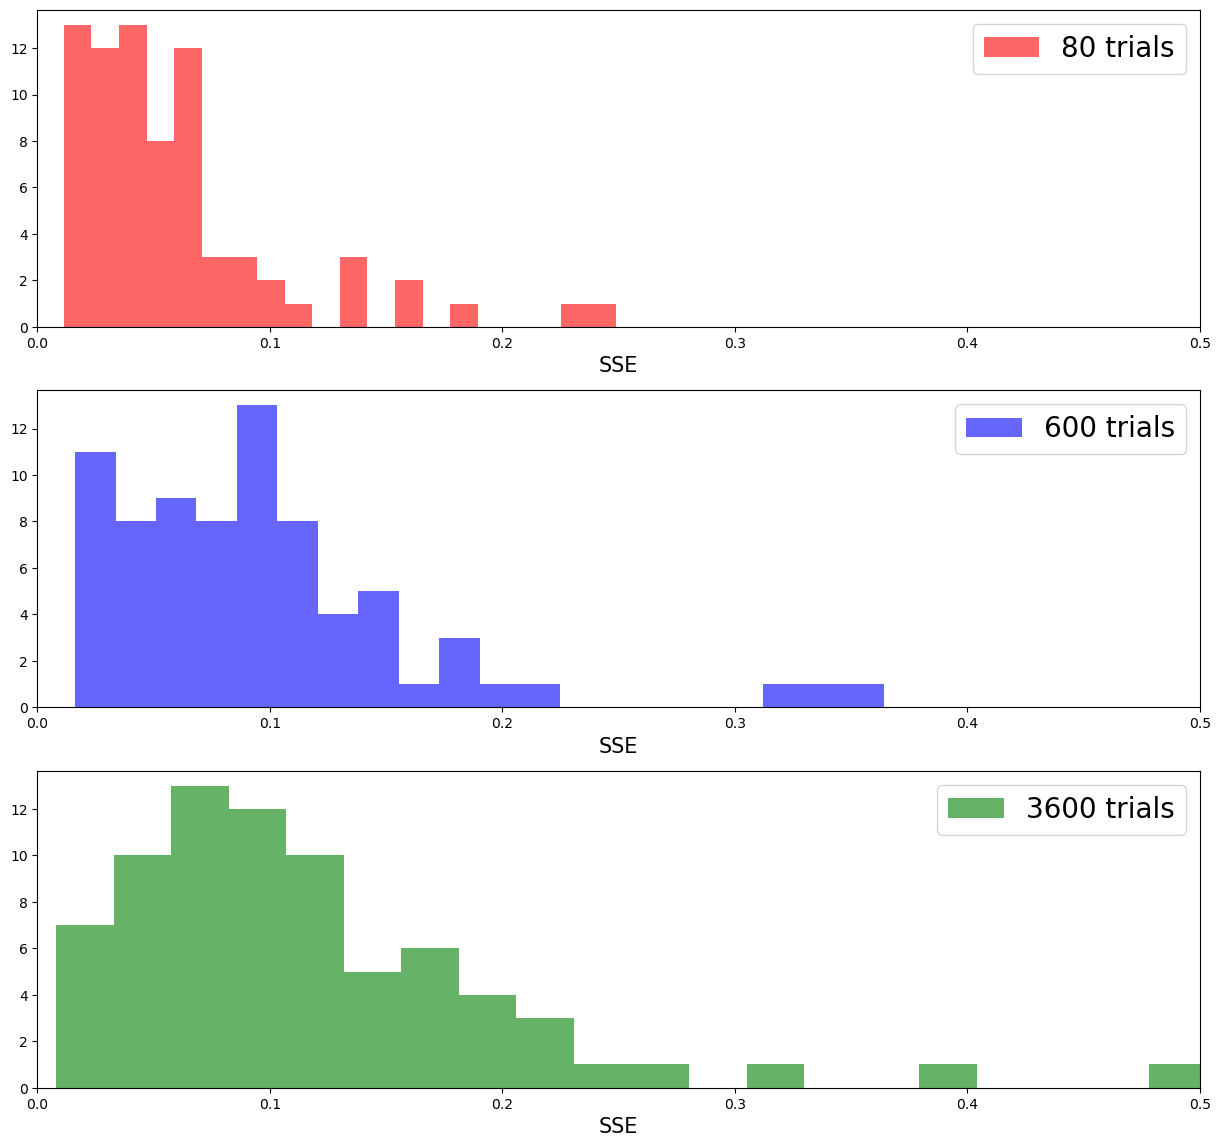

In [207]:
fig = plt.figure(figsize = (15,14))
color_list = ['r', 'b', 'g']
for z, s in enumerate([80, 600, 3600]):
    ax1 = fig.add_subplot(3,1,z+1)
    ax1.set_xlim([0, 0.5])
    ax1.hist(Recover.loc[(Recover['Best'] == 1) & (Recover['Ntrial'] == s), 'SSE'], bins = 20, alpha = 0.6, color = color_list[z], label = str(s) + ' trials')
    ax1.legend(fontsize = 20)
    ax1.set_xlabel('SSE', fontsize = 15)

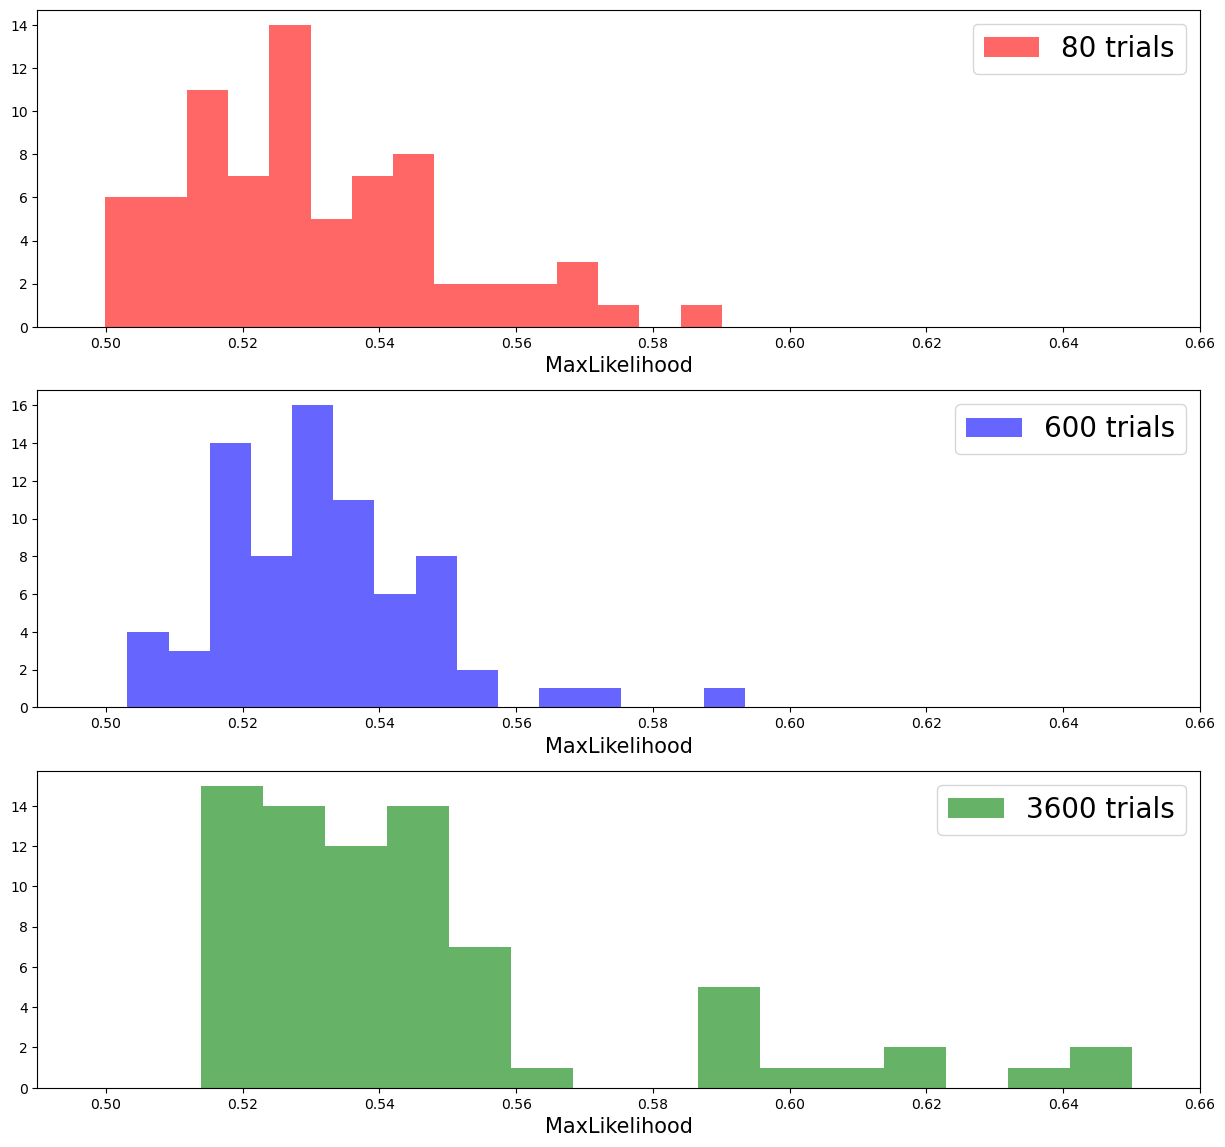

In [181]:
fig = plt.figure(figsize = (15,14))
color_list = ['r', 'b', 'g']
for z, s in enumerate([80, 600, 3600]):
    ax1 = fig.add_subplot(3,1,z+1)
    ax1.set_xlim([0.49, 0.66])
    ax1.hist(Recover.loc[(Recover['Best'] == 1) & (Recover['Ntrial'] == s), 'MaxLikelihood'], bins = 15, alpha = 0.6, color = color_list[z], label = str(s) + ' trials')
    ax1.legend(fontsize = 20)
    ax1.set_xlabel('MaxLikelihood', fontsize = 15)

(array([15., 14., 12., 14.,  7.,  1.,  0.,  0.,  5.,  1.,  1.,  2.,  0.,
         1.,  2.]),
 array([0.51393472, 0.52300923, 0.53208373, 0.54115824, 0.55023274,
        0.55930725, 0.56838175, 0.57745626, 0.58653076, 0.59560527,
        0.60467977, 0.61375428, 0.62282878, 0.63190329, 0.64097779,
        0.6500523 ]),
 <BarContainer object of 15 artists>)

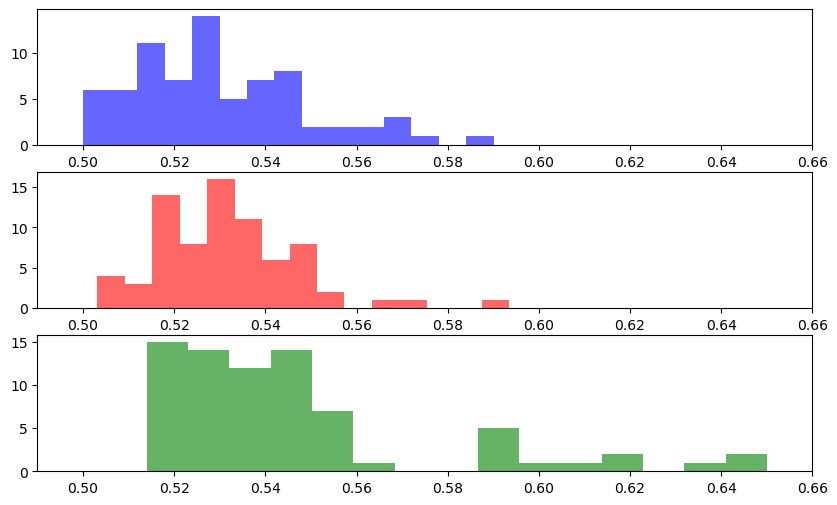

In [168]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(311)
ax1.set_xlim([0.49, 0.66])
ax1.hist(Recover.loc[(Recover['Best'] == 1) & (Recover['Ntrial'] == 80), 'MaxLikelihood'], bins = 15, alpha = 0.6, color = 'b', label = '80')
ax1.legend(fontsize = )
ax2 = fig.add_subplot(312)
ax2.set_xlim([0.49, 0.66])
ax2.hist(Recover.loc[(Recover['Best'] == 1) & (Recover['Ntrial'] == 600), 'MaxLikelihood'], bins = 15, alpha = 0.6, color = 'r', label = '600')
ax3 = fig.add_subplot(313)
ax3.set_xlim([0.49, 0.66])
ax3.hist(Recover.loc[(Recover['Best'] == 1) & (Recover['Ntrial'] == 3600), 'MaxLikelihood'], bins = 15, alpha = 0.6, color = 'g', label = '3600')

Text(0.5, 1.0, 'Best Fitting Results')

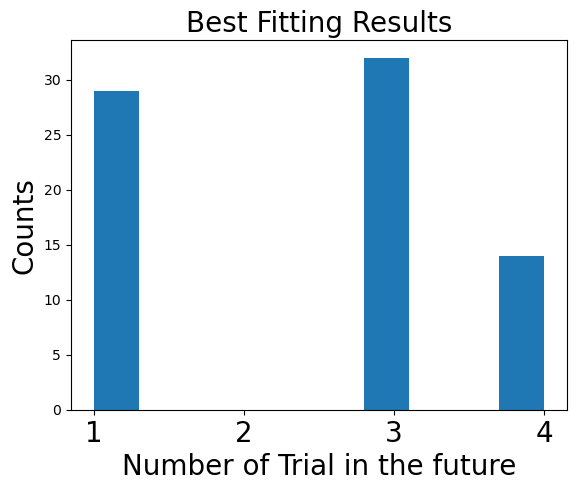

In [18]:
plt.hist(Recover.loc[Recover['Best'] == 1, 'step'])
plt.xlabel('Number of Trial in the future', fontsize = 20)
plt.xticks([1,2,3,4], size = 20)
plt.ylabel('Counts', fontsize = 20)
plt.title('Best Fitting Results', fontsize = 20)

Text(0.5, 1.0, 'Sum Squared Error Depends on the hyperparameter')

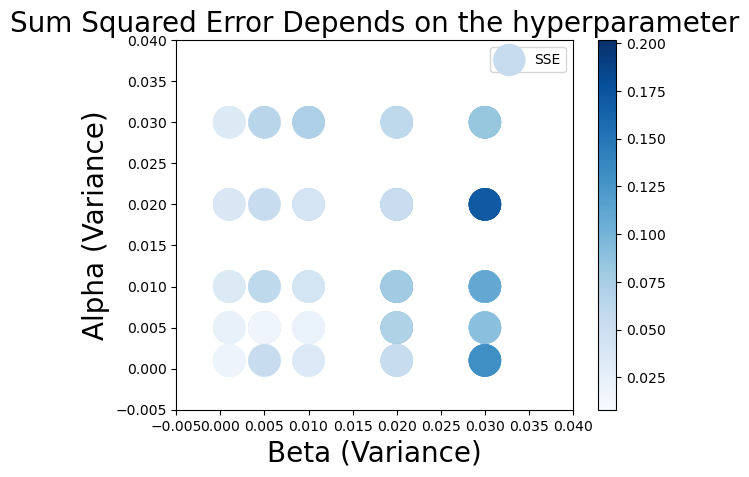

In [31]:
plt.scatter(Model_comp['beta_true'], Model_comp['alpha1_true'], s = 500, c = Model_comp['SSE'], cmap='Blues', label = 'SSE')
plt.xlim([-0.005, 0.040])
plt.ylim([-0.005, 0.040])
plt.xlabel('Beta (Variance)', fontsize = 20)
plt.ylabel('Alpha (Variance)', fontsize = 20)
plt.colorbar()
plt.legend(loc = 'upper right')
plt.title('Sum Squared Error Depends on the hyperparameter', fontsize = 20)

In [113]:
Model_comp = pd.DataFrame()
SSE = []
MLE = []
steps = []
Diff_alpha = []
Diff_beta = []
alpha1_true = []
beta_true = []
for i in Recover['fit_time'].unique():
    for k in range(4):
        SSE.append(Recover.loc[(Recover['fit_time'] == i) & (Recover['step'] == k+1), 'SSE'].min())
        MLE.append(Recover.loc[(Recover['fit_time'] == i) & (Recover['step'] == k+1), 'MaxLikelihood'].max())
        steps.append(k + 1)
        maxindex = Recover.loc[(Recover['fit_time'] == i) & (Recover['step'] == k+1)].idxmax()['MaxLikelihood']
        thisrol = Recover.loc[(Recover['fit_time'] == i) & (Recover['step'] == k+1)].loc[maxindex]
        Diff_alpha.append(abs(thisrol['alpha1'] - thisrol['alpha1_true']))
        Diff_beta.append(abs(thisrol['beta'] - thisrol['beta_true']))
        alpha1_true.append(thisrol['alpha1_true'])
        beta_true.append(thisrol['beta_true'])

In [149]:
Model_comp = pd.DataFrame()
SSE = []
MLE = []
steps = []
Diff_alpha = []
Diff_beta = []
alpha1_true = []
beta_true = []
length_trial = []
for s in [80, 600, 3600]:
    for i in Recover['fit_time'].unique():
        SSE.append(Recover.loc[(Recover['fit_time'] == i) & (Recover['step'] == 1) & (Recover['Ntrial'] == s), 'SSE'].min())
        SSE.append(Recover.loc[(Recover['fit_time'] == i) & (Recover['step'] != 1) & (Recover['Ntrial'] == s), 'SSE'].min())
        MLE.append(Recover.loc[(Recover['fit_time'] == i) & (Recover['step'] == 1) & (Recover['Ntrial'] == s), 'MaxLikelihood'].max())
        MLE.append(Recover.loc[(Recover['fit_time'] == i) & (Recover['step'] != 1) & (Recover['Ntrial'] == s), 'MaxLikelihood'].max())
        steps.append(1)
        steps.append(2)
        maxindex = Recover.loc[(Recover['fit_time'] == i) & (Recover['step'] == 1) & (Recover['Ntrial'] == s)].idxmax()['MaxLikelihood']
        thisrol = Recover.loc[(Recover['fit_time'] == i) & (Recover['step'] == 1) & (Recover['Ntrial'] == s)].loc[maxindex]
        Diff_alpha.append(abs(thisrol['alpha1'] - thisrol['alpha1_true']))
        Diff_beta.append(abs(thisrol['beta'] - thisrol['beta_true']))
        alpha1_true.append(thisrol['alpha1_true'])
        beta_true.append(thisrol['beta_true'])
        
        maxindex = Recover.loc[(Recover['fit_time'] == i) & (Recover['step'] != 1) & (Recover['Ntrial'] == s)].idxmax()['MaxLikelihood']
        thisrol = Recover.loc[(Recover['fit_time'] == i) & (Recover['step'] != 1) & (Recover['Ntrial'] == s)].loc[maxindex]
        Diff_alpha.append(abs(thisrol['alpha1'] - thisrol['alpha1_true']))
        Diff_beta.append(abs(thisrol['beta'] - thisrol['beta_true']))
        alpha1_true.append(thisrol['alpha1_true'])
        beta_true.append(thisrol['beta_true'])
        length_trial.append(s)
        length_trial.append(s)

In [150]:
Model_comp['SSE'] = SSE; Model_comp['MLE'] = MLE; Model_comp['steps'] = steps;
Model_comp['Diff_alpha'] = Diff_alpha; Model_comp['Diff_beta'] = Diff_beta;
Model_comp['alpha1_true'] = alpha1_true; Model_comp['beta_true'] = beta_true
Model_comp['Ntrial'] = length_trial

In [151]:
Model_comp

,SSE,MLE,steps,Diff_alpha,Diff_beta,alpha1_true,beta_true,Ntrial
0,0.076522,0.514856,1,0.004,0.000000e+00,0.030,0.005,80
1,0.082282,0.521380,2,0.003,4.000000e-03,0.030,0.005,80
2,0.039738,0.531659,1,0.002,3.000000e-03,0.030,0.005,80
3,0.047135,0.539054,2,0.003,1.000000e-03,0.030,0.005,80
4,0.019641,0.528509,1,0.004,3.000000e-03,0.030,0.005,80
...,...,...,...,...,...,...,...,...
445,0.096525,0.610110,2,0.000,3.469447e-18,0.001,0.030,3600
446,0.112471,0.607734,1,0.002,2.000000e-03,0.001,0.030,3600
447,0.138967,0.603979,2,0.009,4.000000e-03,0.001,0.030,3600
448,0.124209,0.617967,1,0.000,1.000000e-03,0.001,0.030,3600


/Users/chenjianning/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:b'` for same effect.
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'MaxLikelihood')

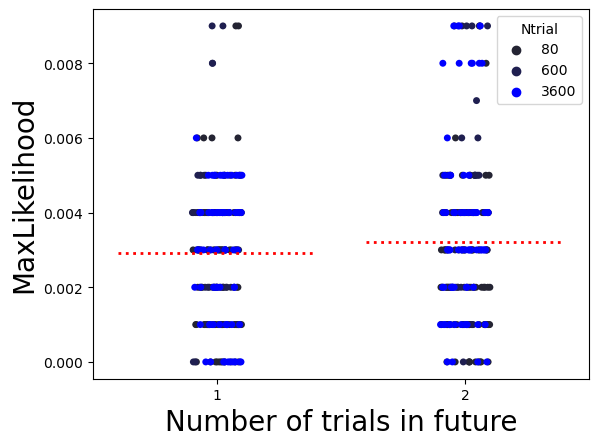

In [154]:
sns.stripplot(x = 'steps', y = 'Diff_alpha', hue = 'Ntrial', data = Model_comp, jitter= True, color = 'b')
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'r', 'ls': ':', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x = 'steps', y = 'Diff_alpha',
            data=Model_comp,
            showfliers=False,
            showbox=False,
            showcaps=False)
plt.xlabel('Number of trials in future', fontsize = 20)
plt.ylabel('MaxLikelihood', fontsize = 20)

Text(0.5, 1.0, 'Model Comparison')

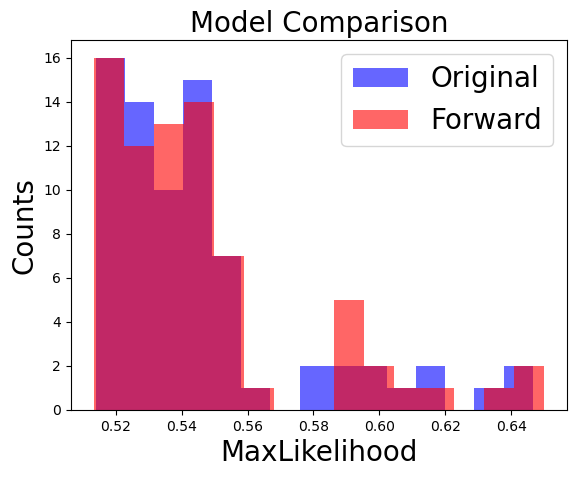

In [117]:
plt.hist(Model_comp.loc[(Model_comp['steps'] == 1), 'MLE'], bins = 15, alpha = 0.6, color = 'b', label = 'Original')
plt.hist(Model_comp.loc[(Model_comp['steps'] == 2), 'MLE'], bins = 15, alpha = 0.6, color = 'r', label = 'Forward')
plt.legend(fontsize = 20)
plt.xlabel('MaxLikelihood', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.title('Model Comparison', fontsize = 20)

Text(0.5, 1.0, 'Model Comparison')

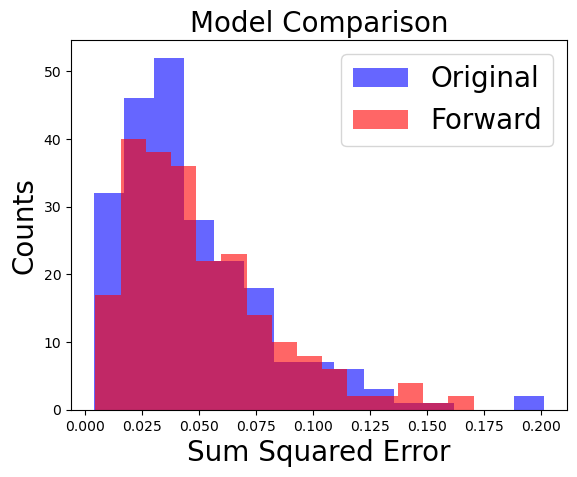

In [185]:
plt.hist(Model_comp.loc[(Model_comp['steps'] == 1), 'SSE'], bins = 15, alpha = 0.6, color = 'b', label = 'Original')
plt.hist(Model_comp.loc[(Model_comp['steps'] == 2), 'SSE'], bins = 15, alpha = 0.6, color = 'r', label = 'Forward')
plt.legend(fontsize = 20)
plt.xlabel('Sum Squared Error', fontsize = 20)
plt.ylabel('Counts', fontsize = 20)
plt.title('Model Comparison', fontsize = 20)

In [26]:
ss.wilcoxon(Model_comp.loc[(Model_comp['steps'] == 1), 'MLE'],Model_comp.loc[(Model_comp['steps'] == 2), 'MLE'], alternative = 'less')

WilcoxonResult(statistic=905.0, pvalue=0.003017353895153904)

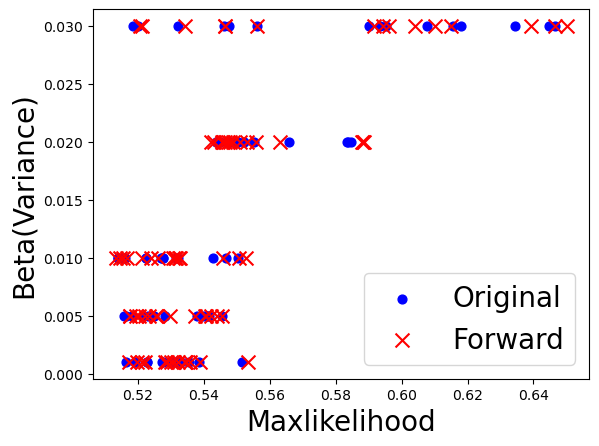

In [29]:
plt.scatter(Model_comp.loc[(Model_comp['steps'] == 1), 'MLE'], Model_comp.loc[(Model_comp['steps'] == 1), 'beta_true'], s = 40, c = 'b', label = 'Original')
plt.scatter(Model_comp.loc[(Model_comp['steps'] == 2), 'MLE'], Model_comp.loc[(Model_comp['steps'] == 2), 'beta_true'], s = 100, c = 'r', marker='x', label = 'Forward')
plt.xlabel('Maxlikelihood', fontsize = 20)
plt.ylabel('Beta(Variance)', fontsize = 20)
plt.legend(fontsize = 20)

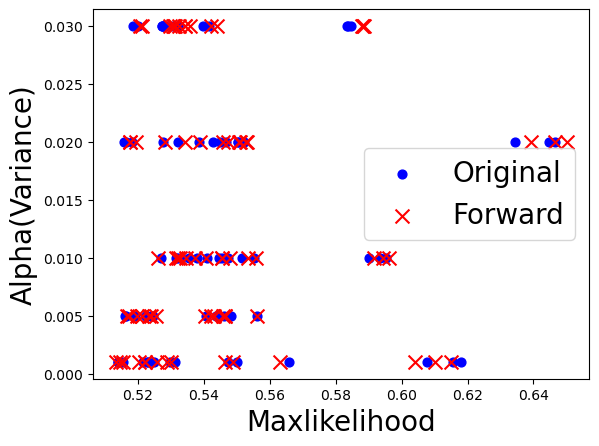

In [30]:
plt.scatter(Model_comp.loc[(Model_comp['steps'] == 1), 'MLE'], Model_comp.loc[(Model_comp['steps'] == 1), 'alpha1_true'], s = 40, c = 'b', label = 'Original')
plt.scatter(Model_comp.loc[(Model_comp['steps'] == 2), 'MLE'], Model_comp.loc[(Model_comp['steps'] == 2), 'alpha1_true'], s = 100, c = 'r', marker='x', label = 'Forward')
plt.xlabel('Maxlikelihood', fontsize = 20)
plt.ylabel('Alpha(Variance)', fontsize = 20)
plt.legend(fontsize = 20)

## for mixed agent

In [4]:
result_path = '/Users/chenjianning/Library/CloudStorage/OneDrive-OIST/PhD materials/thesis_study/Particle_filter/result/recover'

In [ ]:
Recover = pd.DataFrame()
AlphaVar = []
BetaVar = []
Sim_count = []
RunTime = []
Ntrial = []
sim_length = [f for f in os.listdir(result_path) if not f.startswith('.')]
for s in sim_length:
    path_to_file = result_path + '/' + s
    para_pairs = [f for f in os.listdir(path_to_file) if not f.startswith('.')]
    t = 1
    for i in para_pairs:
        time_pairs = [f for f in os.listdir(path_to_file + '/' + i) if not f.startswith('.')]
        for j in time_pairs:
            AlphaVar.append(float(i.split('_')[0].split('Alpha')[1]))
            BetaVar.append(float(i.split('_')[1].split('beta')[1]))
            Sim_count.append(int(list(j)[0]))
            out_file = [f for f in os.listdir(path_to_file + '/' + i + '/' + j) if '.out' in f]
            f = open(path_to_file + '/' + i + '/' + j + '/' + out_file[0], 'r')
            content = f.read()
            f.close() 
            with open(path_to_file + '/' + i + '/' + j + '/result.pkl', 'rb') as f:
                alldata = pickle.load(f)
            A = pd.read_csv(path_to_file + '/' + i + '/' + j + '/data.csv')
            Pre_result = pd.DataFrame(alldata['parameter']).T
            Pre_result['SSE'] = alldata['SSE'].flatten()
            Pre_result['step'] = pd.Series(alldata['n_step']).tolist()
            Pre_result['MaxLikelihood'] = alldata['MaxLikehood'].flatten()
            Pre_result['Best'] = 0
            Pre_result['alpha1_true'] = float(i.split('_')[0].split('Alpha')[1])
            Pre_result['beta_true'] = float(i.split('_')[1].split('beta')[1])
            Pre_result['fit_time'] = t
            Pre_result['Ntrial'] = int(s.split('_')[1])
            Pre_result.loc[Pre_result['MaxLikelihood'] == Pre_result['MaxLikelihood'].max(), ['Best']] = 1
            Recover = pd.concat([Recover, Pre_result])
            RunTime.append(float(content.split('/')[0])/60)
            Ntrial.append(int(s.split('_')[1]))
            t += 1

In [5]:
Recover = pd.DataFrame()
SSE = []
RunTime = []
path_to_file = result_path
para_pairs = [f for f in os.listdir(path_to_file) if not f.startswith('.')]
t = 1
for i in para_pairs:
    time_pairs = [f for f in os.listdir(path_to_file + '/' + i) if not f.startswith('.')]
    for j in time_pairs:
        out_file = [f for f in os.listdir(path_to_file + '/' + i + '/' + j) if '.out' in f]
        f = open(path_to_file + '/' + i + '/' + j + '/' + out_file[0], 'r')
        content = f.read()
        f.close() 
        with open(path_to_file + '/' + i + '/' + j + '/result.pkl', 'rb') as f:
            alldata = pickle.load(f)
        A = pd.read_csv(path_to_file + '/' + i + '/' + j + '/data.csv')
        Pre_result = pd.DataFrame(alldata['parameter']).T
        Pre_result['SSE_alpha'] = pd.Series(np.squeeze([np.median(alldata['SSE'][i], axis = 0) for i in range(len(alldata['SSE']))])[:,0])
        Pre_result['SSE_beta'] = pd.Series(np.squeeze([np.median(alldata['SSE'][i], axis = 0) for i in range(len(alldata['SSE']))])[:,1])
        Pre_result['SSE_epsilon'] = pd.Series(np.squeeze([np.median(alldata['SSE'][i], axis = 0) for i in range(len(alldata['SSE']))])[:,2])
        Pre_result['step'] = pd.Series(alldata['n_step']).tolist()
        Pre_result['MaxLikelihood'] = alldata['MaxLikehood'].flatten()
        Pre_result['Best'] = 0
        Pre_result.loc[Pre_result['MaxLikelihood'].argmax(), 'Best'] = 1
        Pre_result['alpha1_true'] = float(i.split('_')[0].split('Alpha')[1])
        Pre_result['beta_true'] = float(i.split('_')[1].split('beta')[1])
        Pre_result['epsilon_true'] = float(i.split('_')[2].split('epsilon')[1])
        Pre_result['fit_time'] = t
        Recover = pd.concat([Recover, Pre_result])
        RunTime.append(float(content.split('/')[0])/60)
        t += 1

In [249]:
with open('/Users/chenjianning/Library/CloudStorage/OneDrive-OIST/PhD materials/thesis_study/Particle_filter/result/recover/Alpha0.02_beta0.02_epsilon0.03/2nd/result.pkl', 'rb') as f:
    alldata = pickle.load(f)
A = pd.read_csv('/Users/chenjianning/Library/CloudStorage/OneDrive-OIST/PhD materials/thesis_study/Particle_filter/result/recover/Alpha0.02_beta0.02_epsilon0.03/2nd/data.csv')

In [275]:
with open('/Users/chenjianning/Library/CloudStorage/OneDrive-OIST/PhD materials/thesis_study/Particle_filter/result/recover/Alpha0.01_beta0.001_epsilon0.001/2nd/result.pkl', 'rb') as f:
    alldata = pickle.load(f)
A = pd.read_csv('/Users/chenjianning/Library/CloudStorage/OneDrive-OIST/PhD materials/thesis_study/Particle_filter/result/recover/Alpha0.01_beta0.001_epsilon0.001/2nd/data.csv')

In [272]:
with open('/Users/chenjianning/Library/CloudStorage/OneDrive-OIST/PhD materials/thesis_study/Particle_filter/result/recover/Alpha0.02_beta0.01_epsilon0.001/2nd/result.pkl', 'rb') as f:
    alldata = pickle.load(f)
A = pd.read_csv('/Users/chenjianning/Library/CloudStorage/OneDrive-OIST/PhD materials/thesis_study/Particle_filter/result/recover/Alpha0.02_beta0.01_epsilon0.001/2nd/data.csv')

In [276]:
max_index = alldata['MaxLikehood'].argmax(); lens = 2100

/var/folders/1b/gc6hjt1x3hzgg14fv0vw46nh0000gn/T/ipykernel_95787/1031976107.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


(0.0, 1.0)

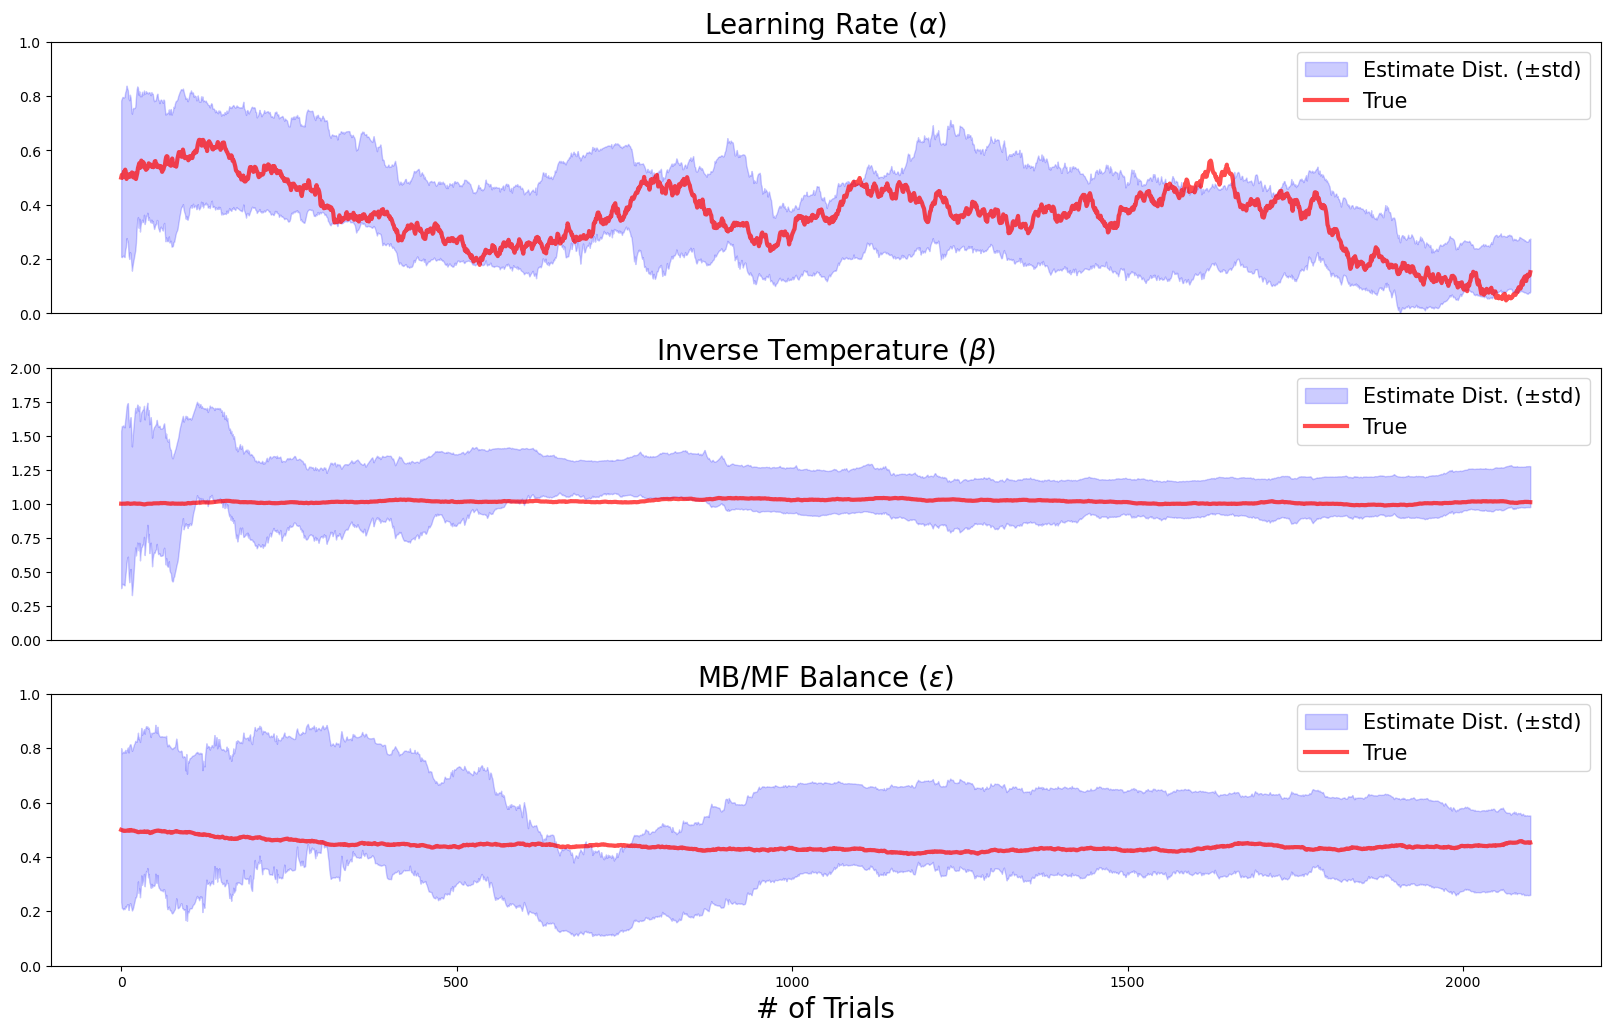

In [132]:

lens = 2100
plt.subplots(figsize = (20,12))
plt.subplot(3,1,1)
mean_ = np.squeeze(alldata['result_mean'][max_index])[:,8]
std_ = np.squeeze(alldata['result_std'][max_index])[:,8]
plt.fill_between(np.linspace(0,lens,lens), mean_ - std_, mean_ + std_, color = 'b', alpha = 0.2, label = 'Estimate Dist. (\u00B1std)')
plt.plot(np.linspace(0,lens,lens),A['alpha1'], 'r',  linewidth = 3, label="True", alpha = 0.7)
plt.title('Learning Rate ('+ r'$\alpha$' + ')', fontsize = 20)
plt.legend(fontsize = 15, loc = 'upper right')
plt.ylim([0,1])
plt.xticks([])
plt.subplot(3,1,2)
mean_ = np.squeeze(alldata['result_mean'][max_index])[:,9]
std_ = np.squeeze(alldata['result_std'][max_index])[:,9]
plt.fill_between(np.linspace(0,lens,lens), mean_ - std_, mean_ + std_, color = 'b', alpha = 0.2, label = 'Estimate Dist. (\u00B1std)')
plt.plot(np.linspace(0,lens,lens),A['beta'], 'r',  linewidth = 3, label="True", alpha = 0.7)
plt.title('Inverse Temperature ('+ r'$\beta$' + ')', fontsize = 20)
plt.legend(fontsize = 15, loc = 'upper right')
plt.xticks([])
plt.ylim([0,2])
plt.subplot(3,1,3)
mean_ = np.squeeze(alldata['result_mean'][max_index])[:,10]
std_ = np.squeeze(alldata['result_std'][max_index])[:,10]
plt.fill_between(np.linspace(0,lens,lens), mean_ - std_, mean_ + std_, color = 'b', alpha = 0.2, label = 'Estimate Dist. (\u00B1std)')
plt.plot(np.linspace(0,lens,lens),A['epsilon'], 'r',  linewidth = 3, label="True", alpha = 0.7)
plt.title('MB/MF Balance ('+ r'$\epsilon$' + ')', fontsize = 20)
plt.legend(fontsize = 15, loc = 'upper right')
plt.xlabel('# of Trials', fontsize = 20)
plt.ylim([0,1])

/var/folders/1b/gc6hjt1x3hzgg14fv0vw46nh0000gn/T/ipykernel_95787/4151846575.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


(-0.2, 1.2)

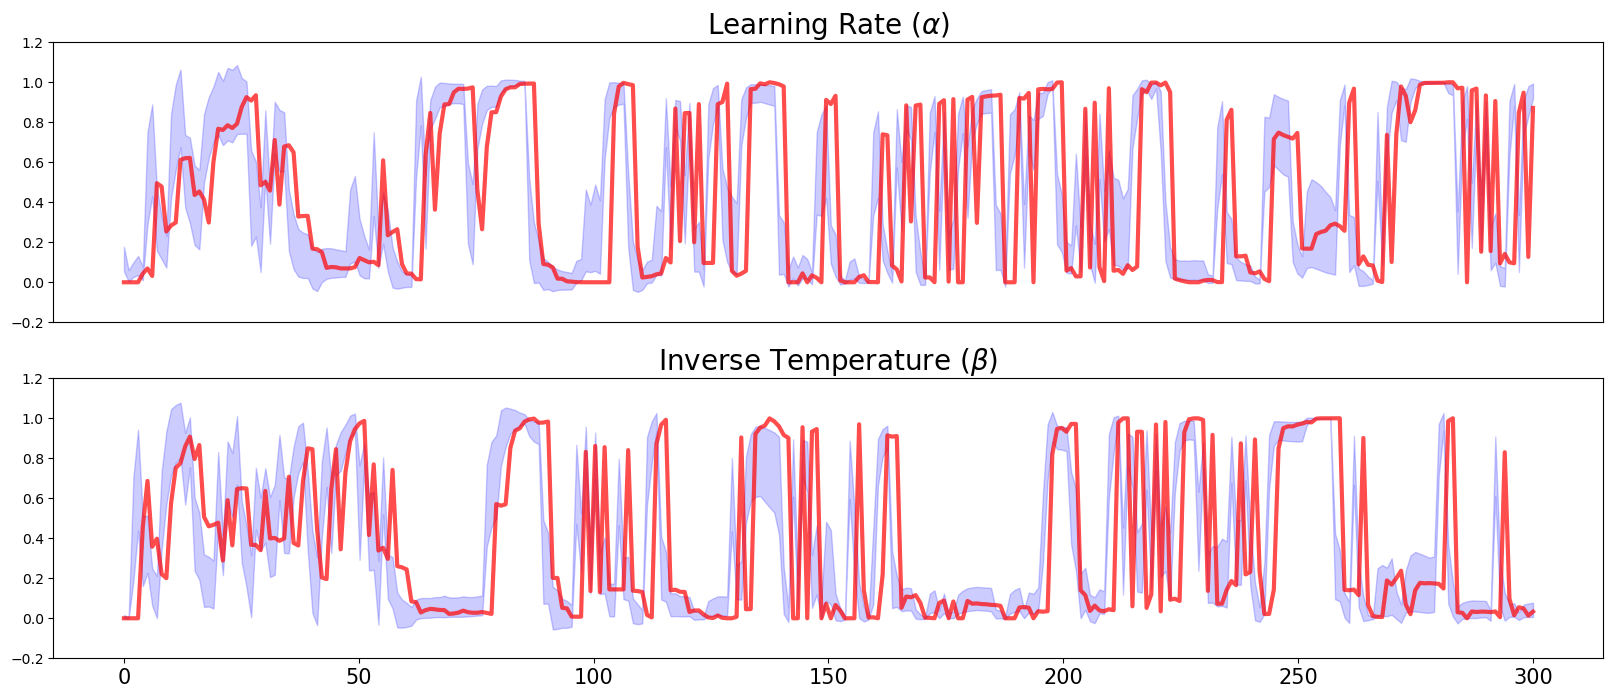

In [163]:
lens = 300
plt.subplots(figsize = (20,8))
plt.subplot(2,1,1)
mean_ = np.squeeze(alldata['result_mean'][max_index])[:,0][0:lens]
std_ = np.squeeze(alldata['result_std'][max_index])[:,0][0:lens]
plt.fill_between(np.linspace(0,lens,lens), mean_ - std_, mean_ + std_, color = 'b', alpha = 0.2, label = 'Estimate Dist. (\u00B1std)')
plt.plot(np.linspace(0,lens,lens),A['QR'][0:lens], 'r',  linewidth = 3, label="True", alpha = 0.7)
plt.title('Learning Rate ('+ r'$\alpha$' + ')', fontsize = 20)
plt.legend([],[], frameon=False)
plt.ylim([-0.2,1.2])
plt.xticks([])
plt.subplot(2,1,2)
mean_ = np.squeeze(alldata['result_mean'][max_index])[:,1][0:lens]
std_ = np.squeeze(alldata['result_std'][max_index])[:,1][0:lens]
plt.fill_between(np.linspace(0,lens,lens), mean_ - std_, mean_ + std_, color = 'b', alpha = 0.2, label = 'Estimate Dist. (\u00B1std)')
plt.plot(np.linspace(0,lens,lens),A['QL'][0:lens], 'r',  linewidth = 3, label="True", alpha = 0.7)
plt.title('Inverse Temperature ('+ r'$\beta$' + ')', fontsize = 20)
plt.legend([],[], frameon=False)
plt.xticks(fontsize = 15)
plt.ylim([-0.2,1.2])

/var/folders/1b/gc6hjt1x3hzgg14fv0vw46nh0000gn/T/ipykernel_95787/619426837.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


Text(0.5, 0, '# of Trials')

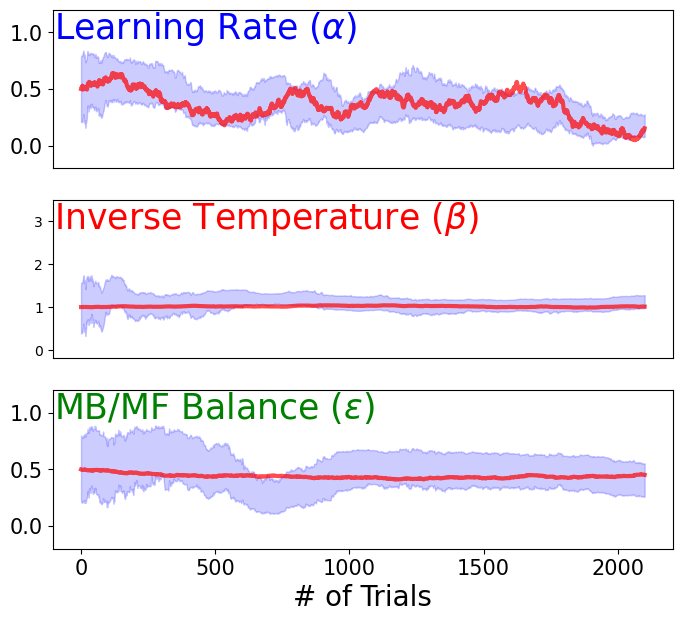

In [280]:
lens = 2100
plt.subplots(figsize = (8,7))
plt.subplot(3,1,1)
mean_ = np.squeeze(alldata['result_mean'][max_index])[:,8]
std_ = np.squeeze(alldata['result_std'][max_index])[:,8]
plt.fill_between(np.linspace(0,lens,lens), mean_ - std_, mean_ + std_, color = 'b', alpha = 0.2, label = 'Estimate Dist. (\u00B1std)')
plt.plot(np.linspace(0,lens,lens),A['alpha1'], 'r',  linewidth = 3, label="True", alpha = 0.7)
plt.yticks(fontsize = 15); 
plt.text(-100,1.2,'Learning Rate ('+ r'$\alpha$' + ')', horizontalalignment = 'left',va = 'top', color = 'b', fontsize = 25)
plt.legend([],[], frameon=False)
plt.ylim([-0.2,1.2])
plt.xticks([])
plt.subplot(3,1,2)
mean_ = np.squeeze(alldata['result_mean'][max_index])[:,9]
std_ = np.squeeze(alldata['result_std'][max_index])[:,9]
plt.fill_between(np.linspace(0,lens,lens), mean_ - std_, mean_ + std_, color = 'b', alpha = 0.2, label = 'Estimate Dist. (\u00B1std)')
plt.plot(np.linspace(0,lens,lens),A['beta'], 'r',  linewidth = 3, label="True", alpha = 0.7)
plt.text(-100,3.5,'Inverse Temperature ('+ r'$\beta$' + ')', horizontalalignment = 'left',va = 'top', color = 'r', fontsize = 25)
plt.legend([],[], frameon=False)
plt.xticks([])
plt.ylim([-0.2,3.5])
plt.subplot(3,1,3)
mean_ = np.squeeze(alldata['result_mean'][max_index])[:,10]
std_ = np.squeeze(alldata['result_std'][max_index])[:,10]
plt.fill_between(np.linspace(0,lens,lens), mean_ - std_, mean_ + std_, color = 'b', alpha = 0.2, label = 'Estimate Dist. (\u00B1std)')
plt.plot(np.linspace(0,lens,lens),A['epsilon'], 'r',  linewidth = 3, label="True", alpha = 0.7)
plt.yticks(fontsize = 15); plt.xticks(fontsize = 15)
plt.text(-100,1.2,'MB/MF Balance ('+ r'$\epsilon$' + ')', horizontalalignment = 'left',va = 'top', color = 'g', fontsize = 25)
plt.legend([],[], frameon=False)
plt.ylim([-0.2,1.2])
plt.xlabel('# of Trials', fontsize = 20)

/var/folders/1b/gc6hjt1x3hzgg14fv0vw46nh0000gn/T/ipykernel_95787/1203519410.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


(-0.2, 1.2)

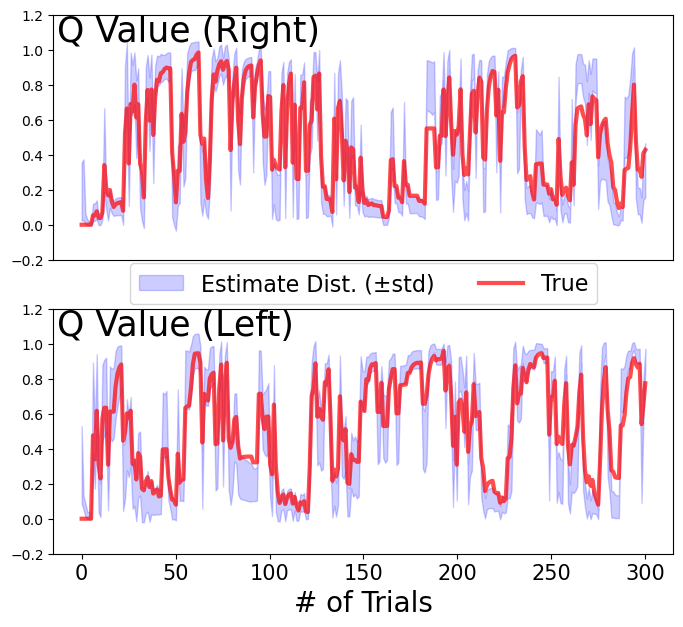

In [290]:
plt.subplots(figsize = (8,7))
lens = 300
plt.subplot(2,1,1)
mean_ = np.squeeze(alldata['result_mean'][max_index])[:,0][0:lens]
std_ = np.squeeze(alldata['result_std'][max_index])[:,0][0:lens]
plt.fill_between(np.linspace(0,lens,lens), mean_ - std_, mean_ + std_, color = 'b', alpha = 0.2, label = 'Estimate Dist. (\u00B1std)')
plt.plot(np.linspace(0,lens,lens),A['QR'][0:lens], 'r',  linewidth = 3, label="True", alpha = 0.7)
plt.text(-13,1.2,'Q Value (Right)', horizontalalignment = 'left',va = 'top', color = 'k', fontsize = 25)
plt.legend([],[], frameon=False)
plt.ylim([-0.2,1.2])
plt.xticks([])
plt.subplot(2,1,2)
mean_ = np.squeeze(alldata['result_mean'][max_index])[:,1][0:lens]
std_ = np.squeeze(alldata['result_std'][max_index])[:,1][0:lens]
plt.fill_between(np.linspace(0,lens,lens), mean_ - std_, mean_ + std_, color = 'b', alpha = 0.2, label = 'Estimate Dist. (\u00B1std)')
plt.plot(np.linspace(0,lens,lens),A['QL'][0:lens], 'r',  linewidth = 3, label="True", alpha = 0.7)
plt.text(-13,1.2,'Q Value (Left)', horizontalalignment = 'left',va = 'top', color = 'k', fontsize = 25)
plt.legend(fontsize = 16, loc = 'upper center', ncol = 5, bbox_to_anchor=(0.5, 1.23));
plt.xticks(fontsize = 15); plt.xlabel('# of Trials', fontsize = 20)
plt.ylim([-0.2,1.2])

Text(0.5, 0, 'Sum Squared Error (Median)')

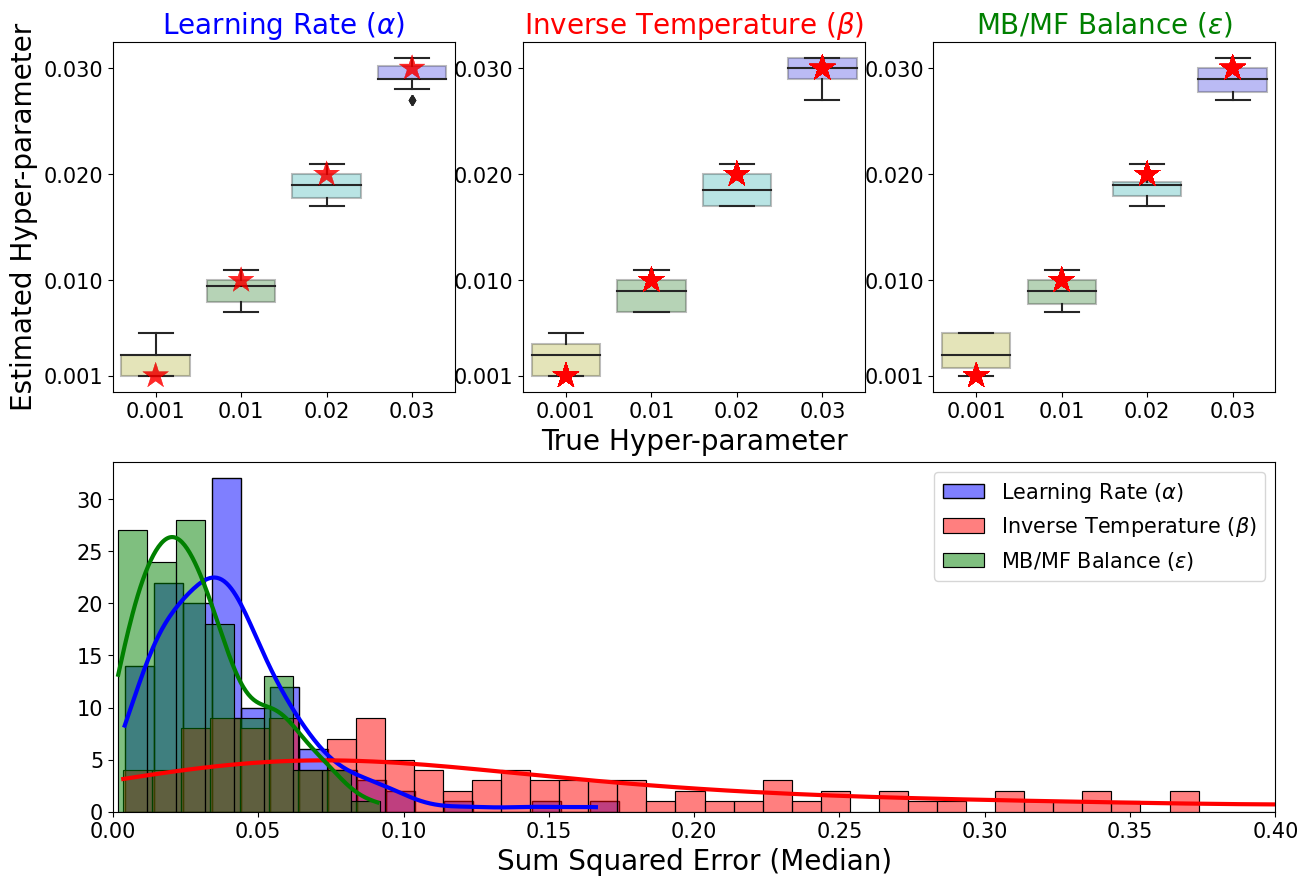

In [6]:
data = Recover[Recover['Best'] == 1]
plt.figure(figsize = (15,10))
plt.subplot(231)
ax = sns.boxplot(x = 'alpha1_true', y = 'alpha1', data = data, palette={'b', 'y', 'g', 'c'}, boxprops=dict(alpha=.3));
sns.stripplot(x = 'alpha1_true', y = 'alpha1_true', data = data, size = 20, marker = '*', jitter=False, color = 'r', alpha = 0.05)
plt.xlabel(None); plt.ylabel('Estimated Hyper-parameter', fontsize = 20); plt.xticks(fontsize = 15); plt.yticks([0.001, 0.01,0.02,0.03], fontsize = 15)
plt.title('Learning Rate ('+ r'$\alpha$' + ')', fontsize = 20, color = 'b')
plt.subplot(232)
ax = sns.boxplot(x = 'beta_true', y = 'beta', data = data, palette={'b', 'y', 'g', 'c'}, boxprops=dict(alpha=.3));
sns.stripplot(x = 'beta_true', y = 'beta_true', data = data, size = 20, marker = '*', jitter=False, color = 'r')
plt.xlabel(None); plt.ylabel(None); plt.xticks(fontsize = 15); plt.yticks([0.001, 0.01,0.02,0.03], fontsize = 15)
plt.title('Inverse Temperature ('+ r'$\beta$' + ')', fontsize = 20, color = 'r'); plt.xlabel('True Hyper-parameter', fontsize = 20)
plt.subplot(233)
ax = sns.boxplot(x = 'epsilon_true', y = 'epsilon', data = data, palette={'b', 'y', 'g', 'c'}, boxprops=dict(alpha=.3))
sns.stripplot(x = 'epsilon_true', y = 'epsilon_true', data = data, size = 20, marker = '*', jitter=False, color = 'r')
plt.xlabel(None); plt.ylabel(None); plt.xticks(fontsize = 15); plt.yticks([0.001, 0.01,0.02,0.03], fontsize = 15)
plt.title('MB/MF Balance ('+ r'$\epsilon$' + ')', fontsize = 20, color = 'g')

plt.subplot(212)
sns.histplot(data.loc[data['Best'] == 1, 'SSE_alpha'], color = 'b', alpha = 0.5, binwidth = 0.01, kde=True, label = 'Learning Rate ('+ r'$\alpha$' + ')', line_kws=dict(linewidth= 3))
sns.histplot(data.loc[data['Best'] == 1, 'SSE_beta'], color = 'r', alpha = 0.5, binwidth = 0.01, kde=True, label = 'Inverse Temperature ('+ r'$\beta$' + ')', line_kws=dict(linewidth= 3))
sns.histplot(data.loc[data['Best'] == 1, 'SSE_epsilon'], color = 'g', alpha = 0.5, binwidth = 0.01, kde=True, label = 'MB/MF Balance ('+ r'$\epsilon$' + ')', line_kws=dict(linewidth= 3))
plt.legend(fontsize = 15); plt.xlim([0,0.4]); plt.yticks(fontsize = 15); plt.xticks(fontsize = 15)
plt.ylabel(None); plt.xlabel('Sum Squared Error (Median)', fontsize = 20)

In [7]:
SSE_var = pd.DataFrame()
SSE_var['SSE'] = pd.concat([data['SSE_alpha'], data['SSE_beta'], data['SSE_epsilon']])
SSE_var['true'] = pd.concat([data['alpha1_true'], data['beta_true'], data['epsilon_true']])
SSE_var['para'] = np.hstack([np.repeat(1, len(data)), np.repeat(2, len(data)), np.repeat(3, len(data))])

/Users/chenjianning/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 10000x300 with 0 Axes>

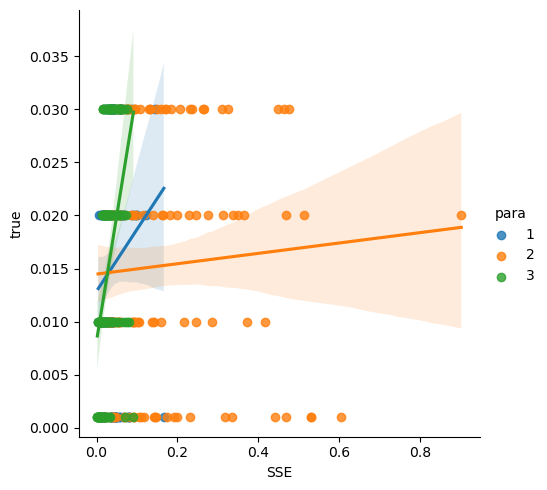

In [8]:
plt.figure(figsize = (100,3))
sns.lmplot(x = 'SSE', y = 'true', hue = 'para', data = SSE_var)

In [48]:
data['alpha1_true'] = pd.Categorical(data['alpha1_true']);
data['beta_true'] = pd.Categorical(data['beta_true']);
data['epsilon_true'] = pd.Categorical(data['epsilon_true'])

/var/folders/1b/gc6hjt1x3hzgg14fv0vw46nh0000gn/T/ipykernel_95787/2066979860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['alpha1_true'] = pd.Categorical(data['alpha1_true']);
/var/folders/1b/gc6hjt1x3hzgg14fv0vw46nh0000gn/T/ipykernel_95787/2066979860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['beta_true'] = pd.Categorical(data['beta_true']);
/var/folders/1b/gc6hjt1x3hzgg14fv0vw46nh0000gn/T/ipykernel_95787/2066979860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

Text(0.5, 1.0, 'MB/MF Balance ($\\epsilon$)')

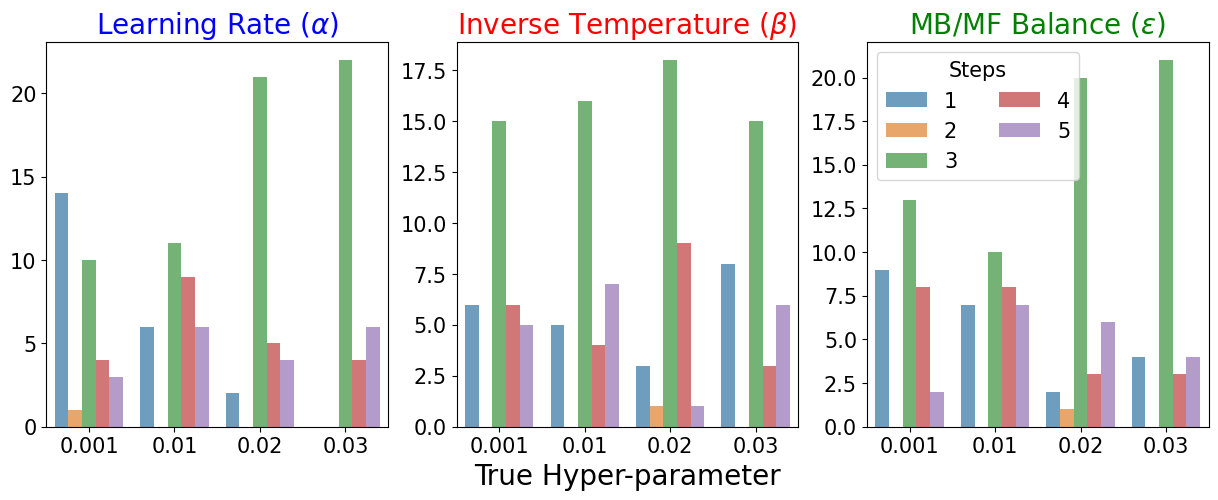

In [264]:
plt.figure(figsize=(15,5))
plt.subplot(131)
ax = sns.countplot(data = data, x = 'alpha1_true', hue = 'step', alpha = 0.7); plt.xlabel(None)
plt.xticks(fontsize = 15); plt.yticks(fontsize = 15); plt.ylabel(None);plt.legend([],[], frameon=False)
plt.title('Learning Rate ('+ r'$\alpha$' + ')', fontsize = 20, color = 'b');
plt.subplot(132)
ax = sns.countplot(data = data, x = 'beta_true', hue = 'step', alpha = 0.7); plt.xlabel('True Hyper-parameter', fontsize = 20)
plt.xticks(fontsize = 15);plt.yticks(fontsize = 15); plt.ylabel(None);
plt.title('Inverse Temperature ('+ r'$\beta$' + ')', fontsize = 20, color = 'r');plt.legend([],[], frameon=False)
plt.subplot(133)
ax = sns.countplot(data = data, x = 'epsilon_true', hue = 'step', alpha = 0.7); plt.xlabel(None)
plt.xticks(fontsize = 15); plt.yticks(fontsize = 15); plt.ylabel(None)
legend = plt.legend(title = 'Steps', fontsize = 15, loc = 'upper left', ncol = 2); plt.setp(legend.get_title(),fontsize=15)
plt.title('MB/MF Balance ('+ r'$\epsilon$' + ')', fontsize = 20, color = 'g')

([<matplotlib.patches.Wedge at 0x3508f8790>,
 [Text(1.0292743320003266, 0.616923293031866, '4'),
  Text(-1.058305517218026, 0.5656760841911974, '3'),
  Text(0.0588812091929012, -1.198554547446207, '1'),
  Text(1.0441043893304536, -0.5914778306757411, '5'),
  Text(1.1996385824354452, -0.02944947422749494, '2')],
 [Text(0.6004100270001905, 0.35987192093525516, '17.2%'),
  Text(-0.6173448850438484, 0.3299777157781985, '50.0%'),
  Text(0.034347372029192365, -0.6991568193436207, '17.2%'),
  Text(0.6090608937760978, -0.345028734560849, '14.8%'),
  Text(0.6997891730873429, -0.017178859966038712, '0.8%')])

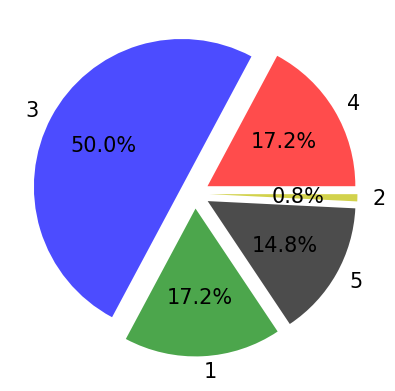

In [190]:
step_count = Counter(data['step'])

plt.pie(step_count.values(), labels = step_count.keys(), explode=[0.1,0.1,0.1,0.1,0.1], colors = ['r', 'b', 'g', 'k', 'y'] 
        ,wedgeprops={'alpha':0.7}, textprops={'fontsize':15}, autopct='%1.1f%%')

In [241]:
Model_comp = pd.DataFrame()
MLE = []
Version = []
alpha_est = []
beta_est = []
epsilon_est = []
alpha1_true = []
beta_true = []
epsilon_true = []
alpha1_SSE = []
beta_SSE = []
epsilon_SSE = []
for i in Recover['fit_time'].unique():
    data_ = Recover.loc[(Recover['fit_time'] == i)]
    if data_.loc[data_['Best'] == 1, 'step'].tolist() != 1:
        data_ = Recover.loc[(Recover['fit_time'] == i) & (Recover['step'] == 1)]
        Version.append(0)
        max_index = data_['MaxLikelihood'].argmax()
        Model_comp = pd.concat([Model_comp, data_.iloc[max_index]], axis =1)
        data_ = Recover.loc[(Recover['fit_time'] == i) & (Recover['step'] != 1)]
        Version.append(1)
        max_index = data_['MaxLikelihood'].argmax()
        Model_comp = pd.concat([Model_comp, data_.iloc[max_index]], axis =1)
Model_comp = Model_comp.T
Model_comp['version'] = Version

In [242]:
Model_comp

,alpha1,beta,epsilon,SSE_alpha,SSE_beta,SSE_epsilon,step,MaxLikelihood,Best,alpha1_true,beta_true,epsilon_true,fit_time,version
585,0.011,0.030,0.029,0.010143,0.064194,0.034496,1.0,0.522915,0.0,0.010,0.03,0.03,1.0,0
178,0.008,0.029,0.027,0.035453,0.448289,0.024856,4.0,0.526600,1.0,0.010,0.03,0.03,1.0,1
230,0.008,0.031,0.028,0.006016,0.167833,0.026717,1.0,0.532379,0.0,0.010,0.03,0.03,2.0,0
622,0.011,0.031,0.031,0.010174,0.463031,0.022697,3.0,0.535071,1.0,0.010,0.03,0.03,2.0,1
515,0.031,0.017,0.020,0.024845,0.038076,0.019377,1.0,0.552181,0.0,0.030,0.02,0.02,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,0.021,0.028,0.027,0.030755,0.050205,0.068855,3.0,0.530427,1.0,0.020,0.03,0.03,126.0,1
90,0.001,0.020,0.010,0.104296,0.050723,0.037669,1.0,0.512335,0.0,0.001,0.02,0.01,127.0,0
608,0.005,0.021,0.008,0.019876,0.057962,0.074926,4.0,0.513513,1.0,0.001,0.02,0.01,127.0,1
255,0.003,0.017,0.008,0.106819,0.084267,0.010190,1.0,0.517629,0.0,0.001,0.02,0.01,128.0,0


In [243]:
Model_comp['SSE_alpha'] = Model_comp['SSE_alpha']
Model_comp['SSE_beta'] = Model_comp['SSE_beta']
Model_comp['SSE_epsilon'] = Model_comp['SSE_epsilon']

In [244]:
x = 'version'; y = 'MaxLikelihood'; df = Model_comp; order = [0,1]
hue_plot_params = {'data': df,'x': x,'y': y,"order": order,"palette": {'r', 'b'}}
pairs = [(0,1)]

0 vs. 1: t-test paired samples, P_val:8.414e-21 t=-1.125e+01


(<Axes: ylabel='MaxLikeliHood'>,
 [<statannotations.Annotation.Annotation at 0x2eb965210>])

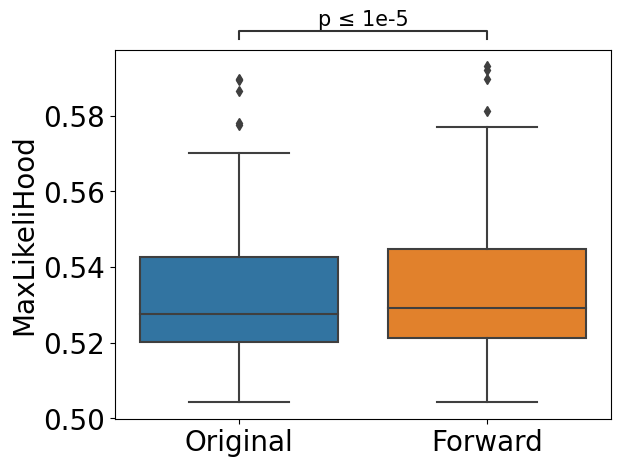

In [247]:

x = 'version'; y = 'MaxLikelihood'; df = Model_comp; order = [0,1]
hue_plot_params = {'data': df,'x': x,'y': y,"order": order,"palette": {'r', 'b'}}
pairs = [(0,1)]
ax = sns.boxplot(x = x, y = y, data = df); plt.xticks([0, 1], ["Original", 'Forward'], fontsize = 20)
plt.xlabel(None); plt.yticks(fontsize = 20); plt.ylabel('MaxLikeliHood', fontsize = 20)
annotator = Annotator(ax, pairs,**hue_plot_params)
annotator.configure(test='t-test_paired',text_format='simple', loc = 'outside', show_test_name = False, fontsize = 15)
annotator.apply_and_annotate()

0 vs. 1: t-test paired samples, P_val:8.414e-21 t=-1.125e+01


(<Axes: ylabel='MaxLikeliHood'>,
 [<statannotations.Annotation.Annotation at 0x2dbc15610>])

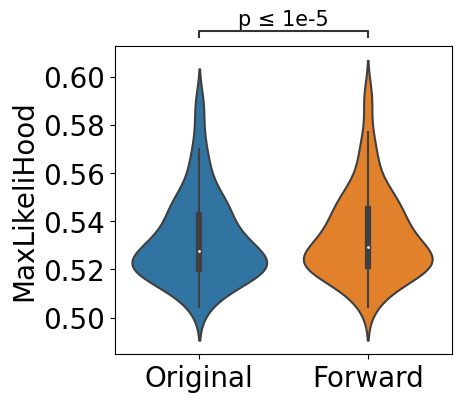

In [18]:
plt.figure(figsize = (20, 4))
plt.subplot(141)
x = 'version'; y = 'MaxLikelihood'; df = Model_comp; order = [0,1]
hue_plot_params = {'data': df,'x': x,'y': y,"order": order,"palette": {'r', 'b'}}
pairs = [(0,1)]
ax = sns.violinplot(x = x, y = y, data = df); plt.xticks([0, 1], ["Original", 'Forward'], fontsize = 20)
plt.xlabel(None); plt.yticks(fontsize = 20); plt.ylabel('MaxLikeliHood', fontsize = 20)
annotator = Annotator(ax, pairs,**hue_plot_params)
annotator.configure(test='t-test_paired',text_format='simple', loc = 'outside', show_test_name = False, fontsize = 15)
annotator.apply_and_annotate()


In [418]:
ex_x = np.hstack([np.repeat(0.2,30), np.repeat(0.5,35), np.repeat(0.8,40),np.repeat(0.5,38), np.repeat(0.8,33), np.repeat(0.2,37)]).flatten()
ex_y = 1 - ex_x

In [398]:
trans_line = np.hstack([np.repeat(0,50), np.repeat(0,40), np.repeat(1,23),np.repeat(1,38), np.repeat(0,60), np.repeat(1,20)]).flatten()
lines = np.linspace(0, 231, 231)

In [393]:
range(90, 90+23)

range(90, 113)

In [391]:
trans_line_new = np.delete(trans_line_new, range(50))
trans_line_new = np.delete(trans_line_new, range(90, 90+23))
ex_x_new = np.delete(ex_x_new, range(50))
ex_x_new = np.delete(ex_x_new, range(90, 90+23))
ex_y_new = np.delete(ex_y_new, range(50))
ex_y_new = np.delete(ex_y_new, range(90, 90+23))

In [409]:
ex_x = np.hstack([np.repeat(0.2,50), np.repeat(0.5,40), np.repeat(0.8,23),np.repeat(0.5,38), np.repeat(0.8,60), np.repeat(0.2,20)]).flatten()
ex_y = 1 - ex_x

In [410]:
ex_x = np.hstack([np.repeat(0.2,50), np.repeat(0.5,40), np.repeat(0.8,23),np.repeat(0.5,38), np.repeat(0.8,60), np.repeat(0.2,20)]).flatten()
ex_y = np.hstack([np.repeat(0.5,50), np.repeat(0.2,40), np.repeat(0.8,23),np.repeat(0.8,38), np.repeat(0.2,60), np.repeat(0.5,20)]).flatten()

In [411]:
len(ex_x)

231

Text(0, 0.5, 'Reward Probability')

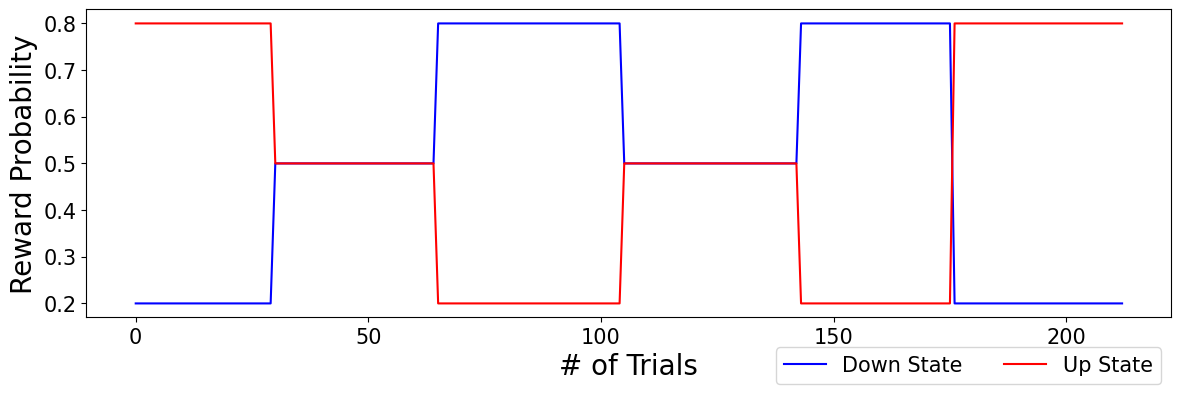

In [419]:
plt.figure(figsize = (14,4))
plt.plot(ex_x, 'b', label = 'Down State', linestyle = '-')
plt.plot(ex_y, 'r', label = 'Up State', linestyle = '-')

plt.legend(fontsize = 15, loc = 'lower right', ncol = 2, bbox_to_anchor=(1, -.25))
plt.xticks(fontsize = 15); plt.xlabel('# of Trials', fontsize = 20)
plt.yticks(fontsize = 15); plt.ylabel('Reward Probability', fontsize = 20)

Text(0, 0.5, 'Transition Type')

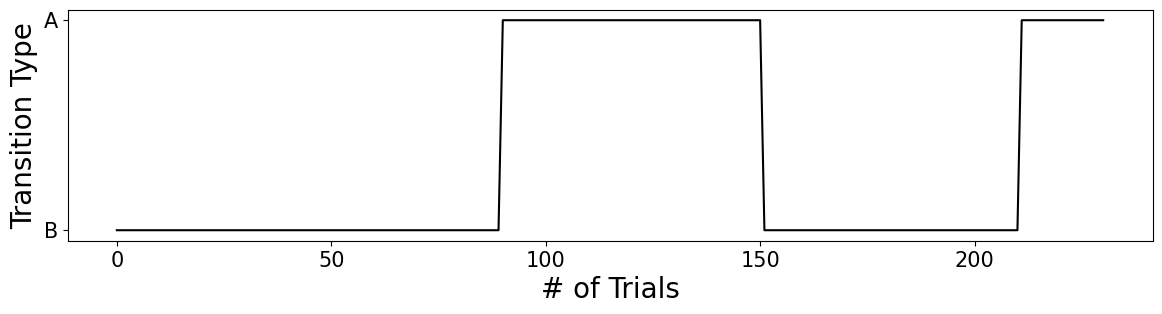

In [407]:
plt.figure(figsize = (14,3))
plt.plot(trans_line, 'k')

plt.xticks(fontsize = 15); plt.xlabel('# of Trials', fontsize = 20)
plt.yticks([0,1], ['B', 'A'], fontsize = 15); plt.ylabel('Transition Type', fontsize = 20)